In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Dataset/1589679298-1589679343.csv')
print(df.columns)

Index(['-8.84', '0.97', '0.02', '38.6'], dtype='object')


In [ ]:
df.fillna(df.mean(), inplace=True)                         #NAN value, change with mean
df['-8.84'] = pd.to_numeric(df['-8.84'], errors='coerce')  #conversion to numerica
df['0.97'] = pd.to_numeric(df['0.97'], errors='coerce')
df['0.02'] = pd.to_numeric(df['0.02'], errors='coerce')
df['38.6'] = pd.to_numeric(df['38.6'], errors='coerce')
df.dropna(inplace=True)                                    #removes row with NAN values
print(df.head())

   -8.84  0.97  0.02   38.6
0  -8.81  1.40 -0.49  38.55
1  -8.91  0.72 -1.68  38.65
2  -9.59 -0.79 -2.61  38.60
3  -9.85 -1.53 -2.27  38.60
4  -9.50 -0.53 -0.77  38.60


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
from scipy.signal import find_peaks
df = pd.read_csv('/content/drive/MyDrive/Dataset/1589679298-1589679343.csv', names=["x","y","z","temperature"], sep=",",dtype={"x": np.float32, "y": np.float32, "z": np.float32, "c": np.float32})
df.head()

x     y     z  temperature
0 -8.84  0.97  0.02        38.60
1 -8.81  1.40 -0.49        38.55
2 -8.91  0.72 -1.68        38.65
3 -9.59 -0.79 -2.61        38.60
4 -9.85 -1.53 -2.27        38.60

In [ ]:
df.describe()

x             y             z   temperature
count  12727.000000  12727.000000  12727.000000  12727.000000
mean      -9.290668     -0.031465     -1.285044     39.289358
std        0.399983      1.068832      1.007616      0.186826
min       -9.950000     -1.670000     -2.860000     38.510000
25%       -9.720000     -1.080000     -2.315000     39.210000
50%       -9.290000     -0.050000     -1.290000     39.310000
75%       -8.860000      1.050000     -0.250000     39.450000
max       -8.630000      1.640000      0.270000     39.680000

In [ ]:
bool_series = pd.isnull(df["x"])
df[bool_series]

Empty DataFrame
Columns: [x, y, z, temperature]
Index: []

THE DATASET HAS BEEN CLEANED

In [ ]:
def time_freq_plot(tm, ampl1, smpl_freq, axis, time1):
    fig, axes = plt.subplots(2, 1, figsize=(14, 6)) #2 rows and 1 column for time and fre plot
    plt.subplots_adjust(hspace=.5) #this means vertical space between 2 plots

    # Time domain plot
    axes[0].set_title('Time domain of '+axis+'-axis at '+time.ctime(time1))
    # axes[0] represents the first plot, i.e. time plot
    # time1 is in epoch format so we have to convert it in a format easy to read
    axes[0].plot(tm, ampl1)
    axes[0].set_xlabel('Time (s)')
    axes[0].set_ylabel('Amplitude (m/s^2)')

    #FFT
    ft_ = np.fft.fft(ampl1 - ampl1.mean()) / len(ampl1)  # Demeaning, FFT and amplitude normalization
    ft_ = ft_[range(int(len(ampl1)/2))]   # Excluding sampling frequency
    tp_cnt = len(ampl1)
    val_ = np.arange(int(tp_cnt / 2))
    tm_period_ = tp_cnt / smpl_freq
    freq_ = val_ / tm_period_

    # Frequency domain plot
    axes[1].set_title('Fourier transform of '+axis+'-axis at '+time.ctime(time1))
    axes[1].plot(freq_, abs(ft_))
    axes[1].set_xlabel('Frequency (Hz)')
    axes[1].set_ylabel('Amplitude')


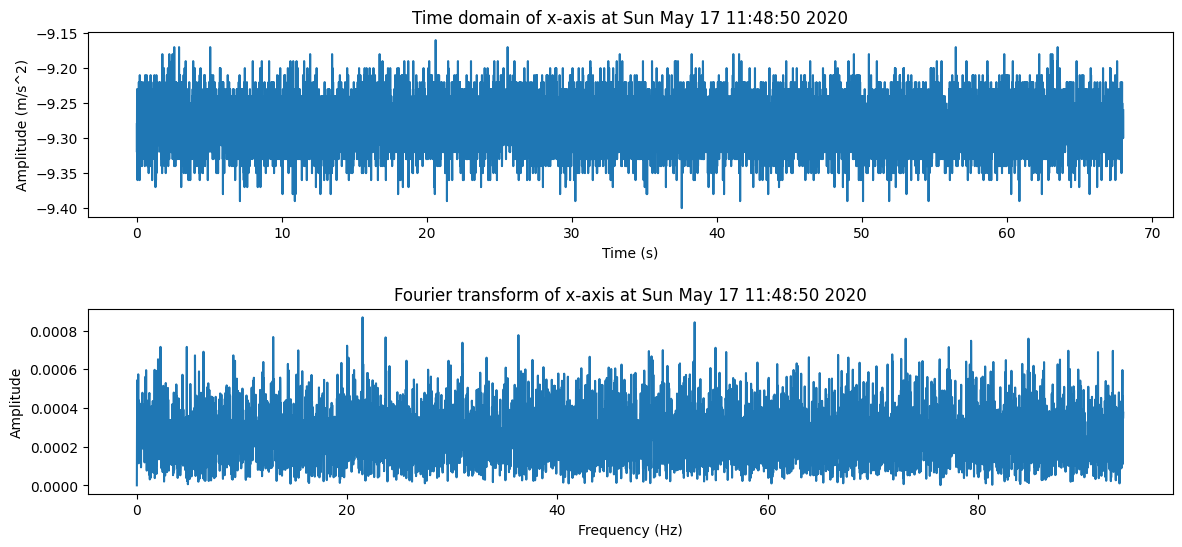

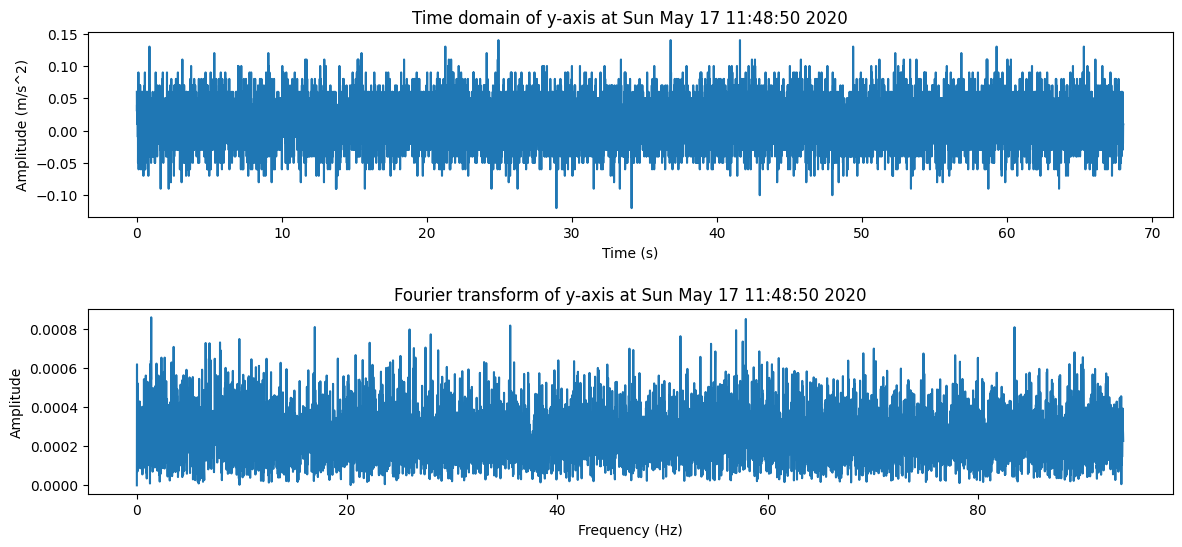

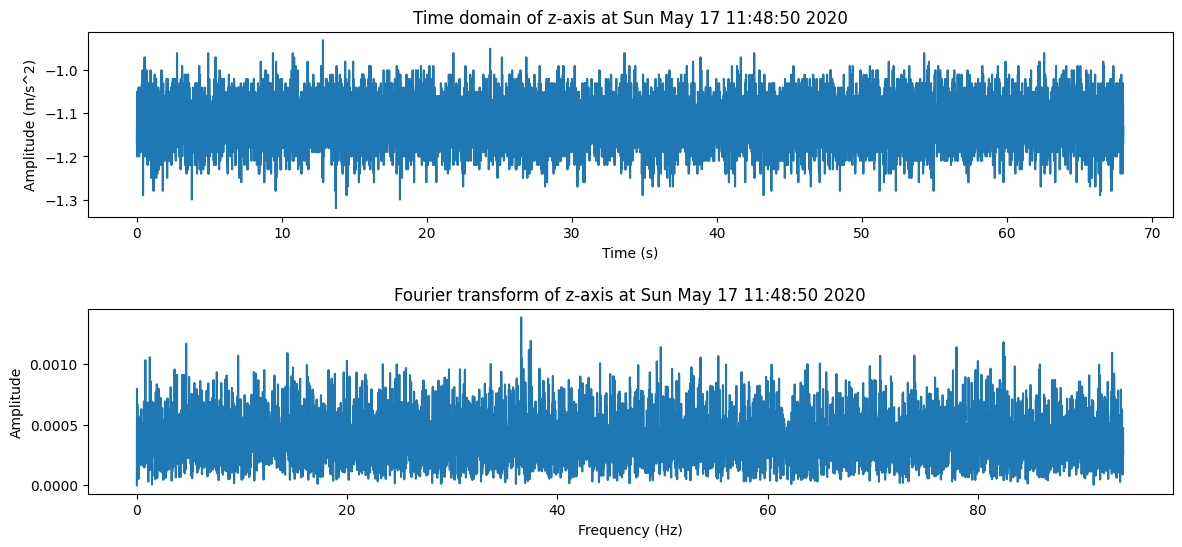

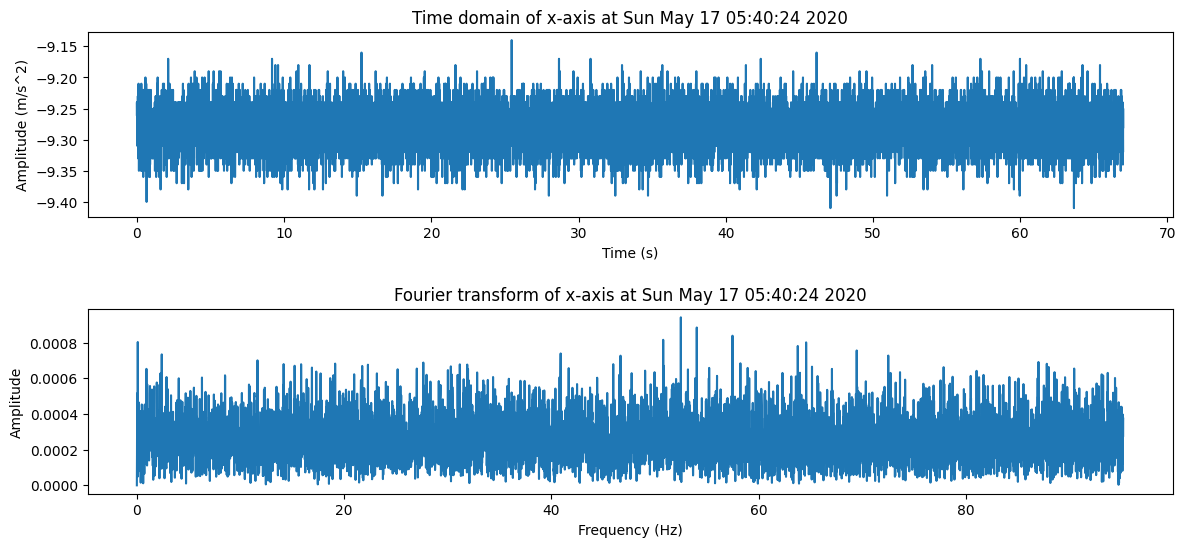

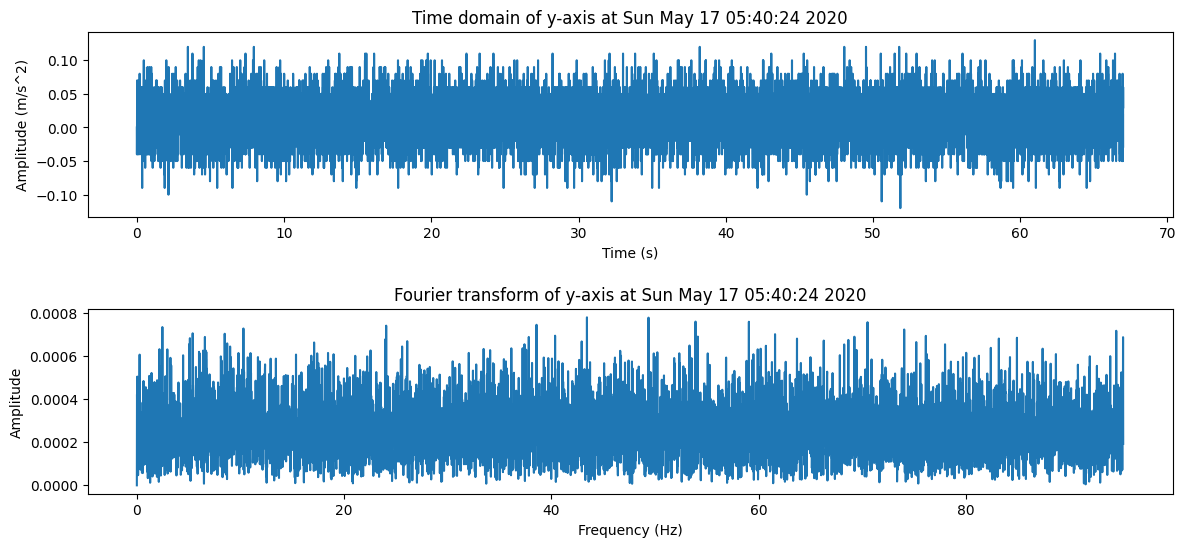

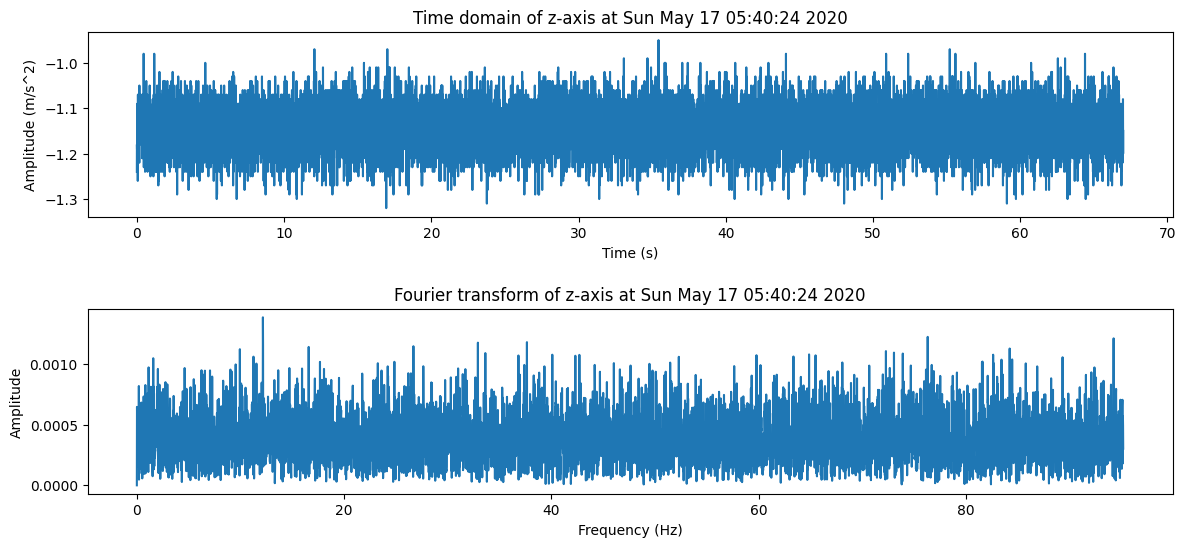

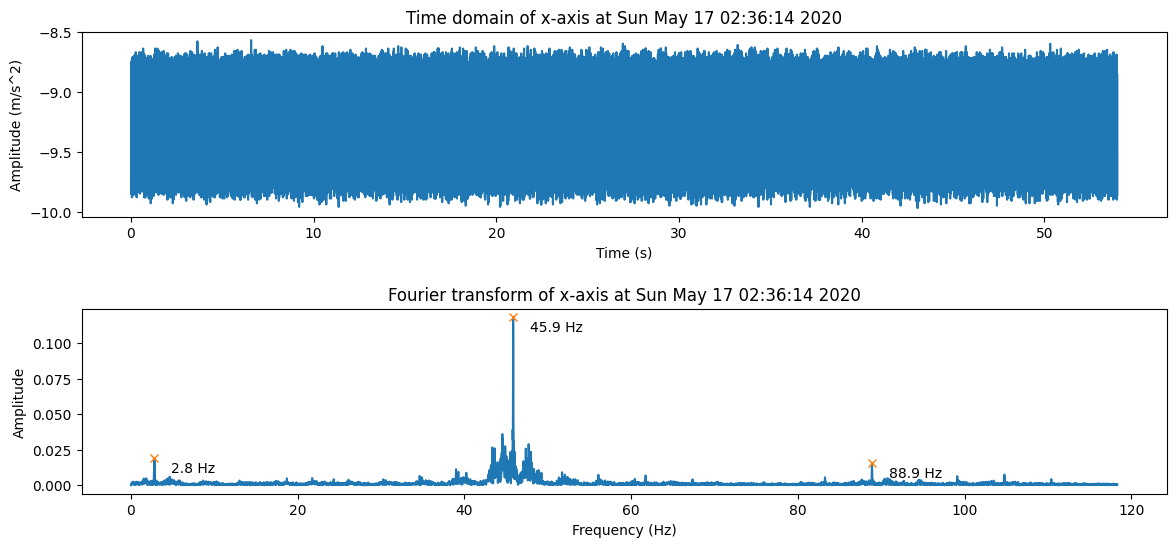

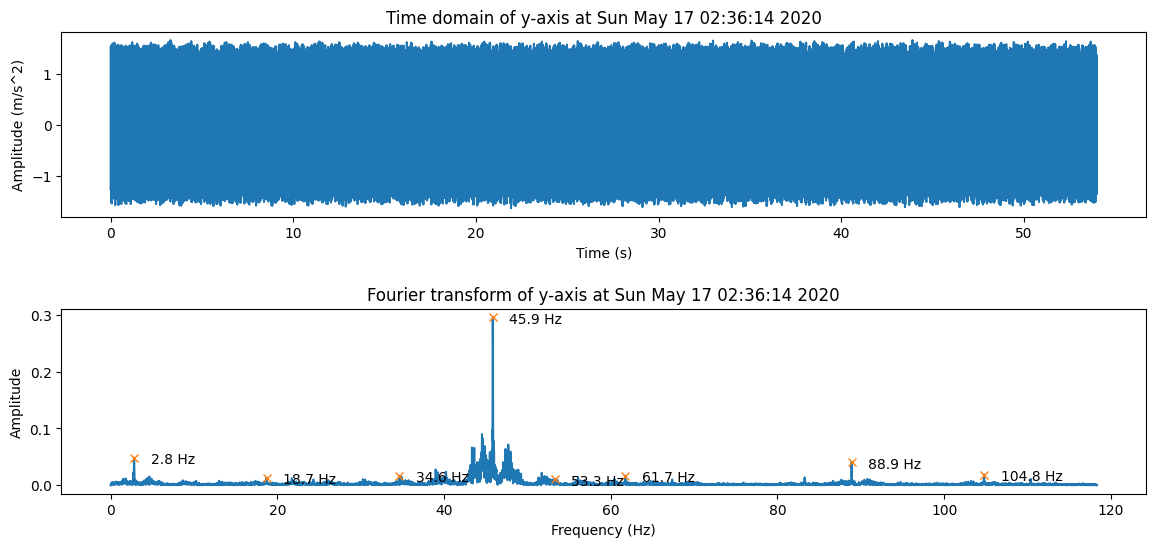

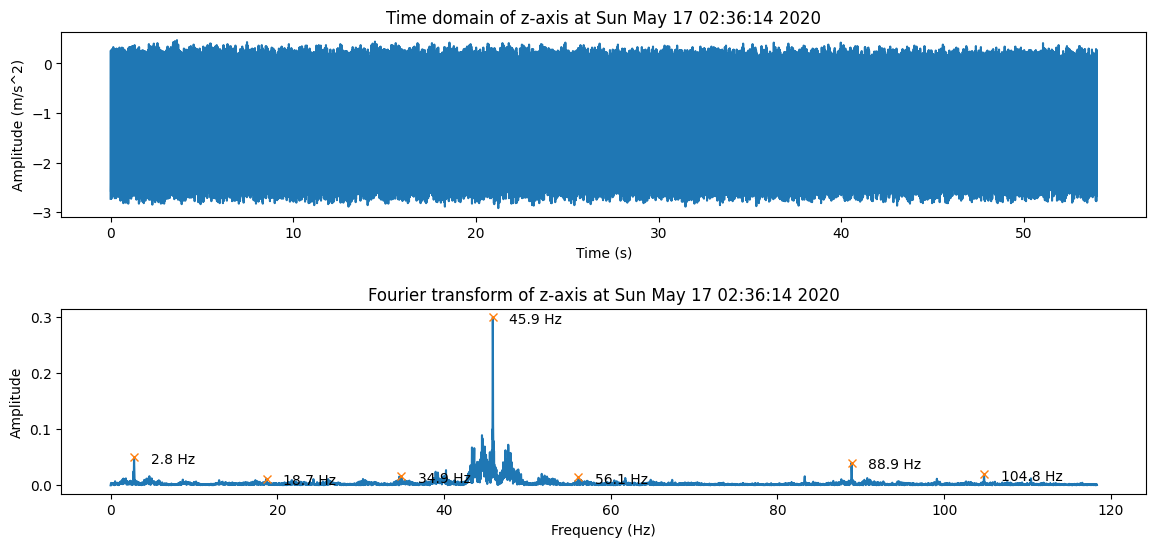

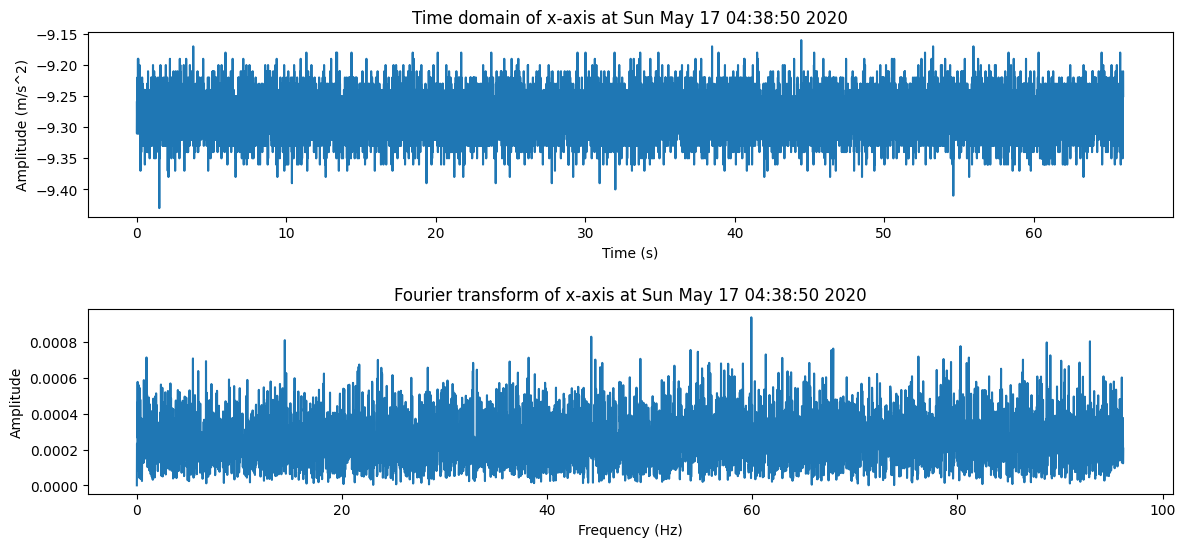

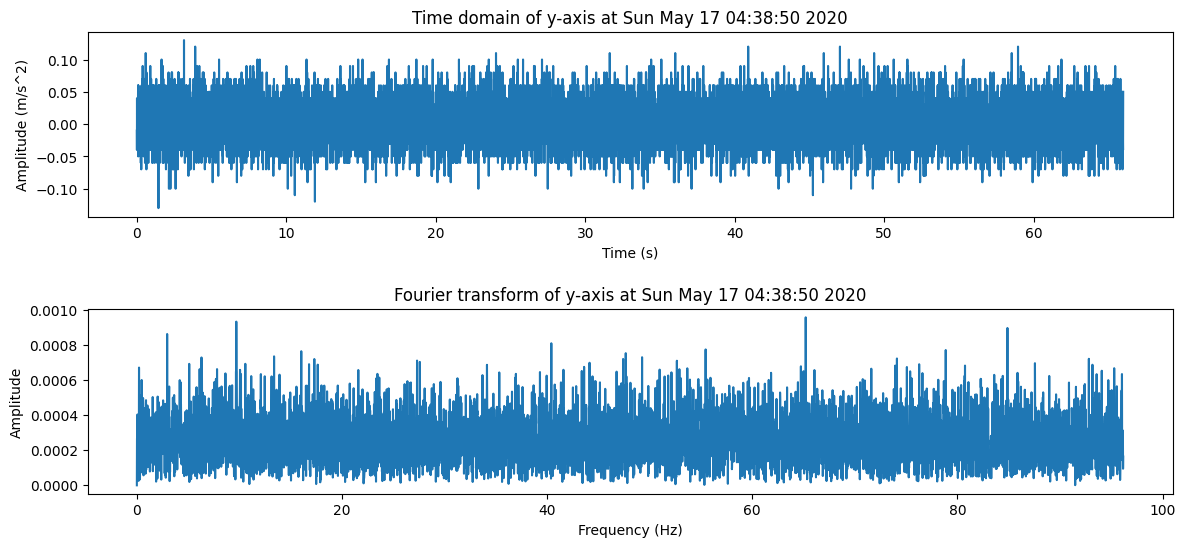

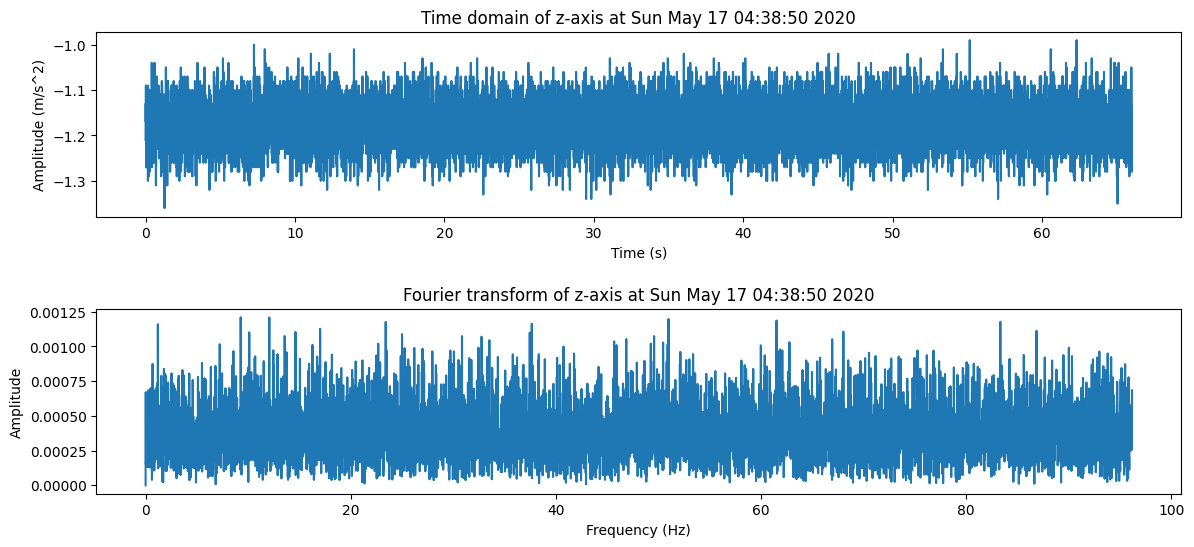

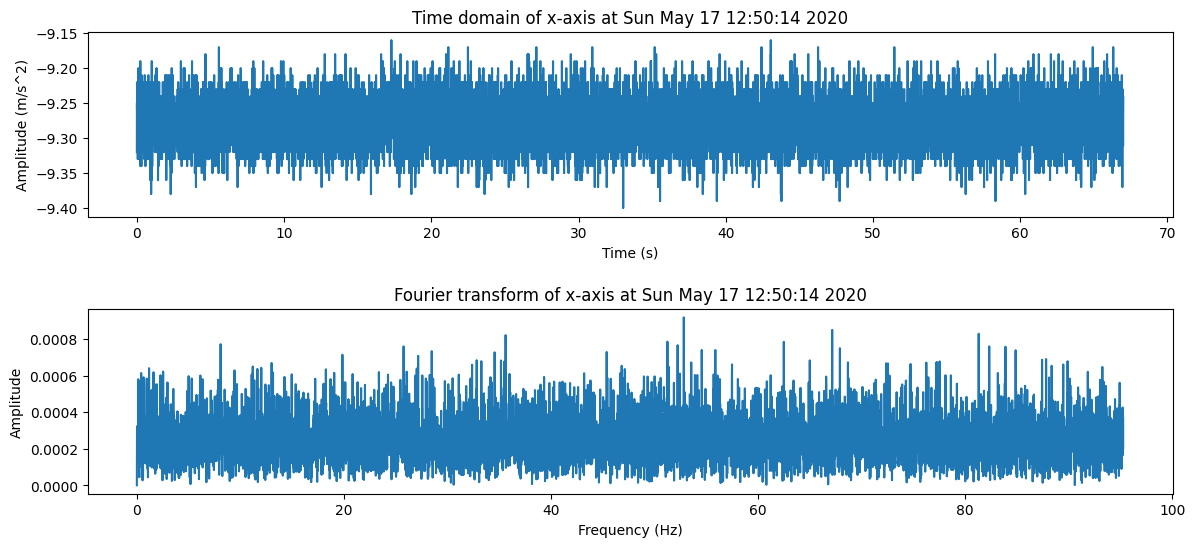

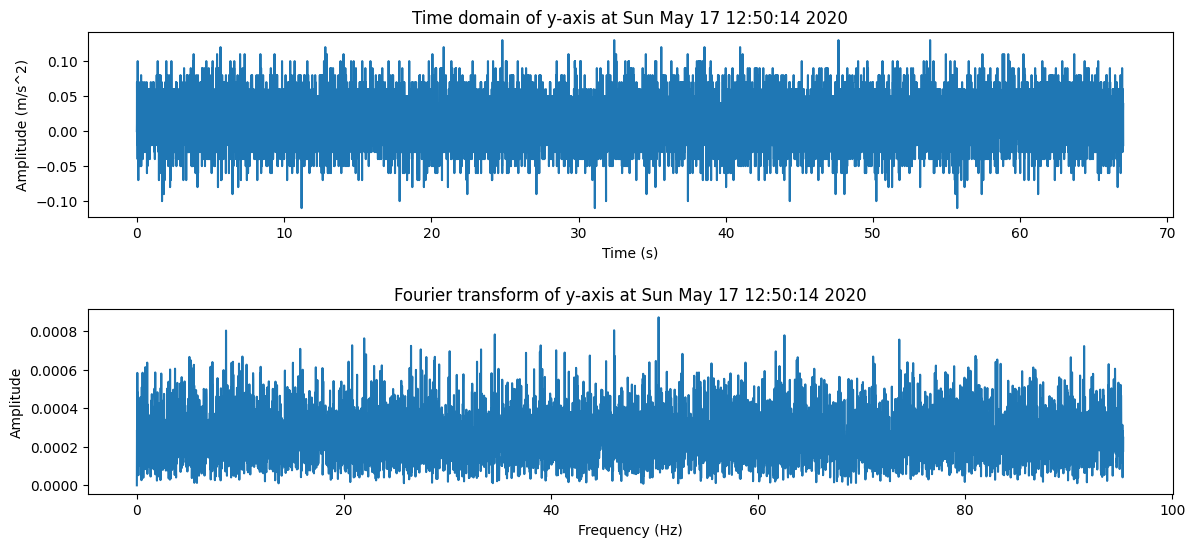

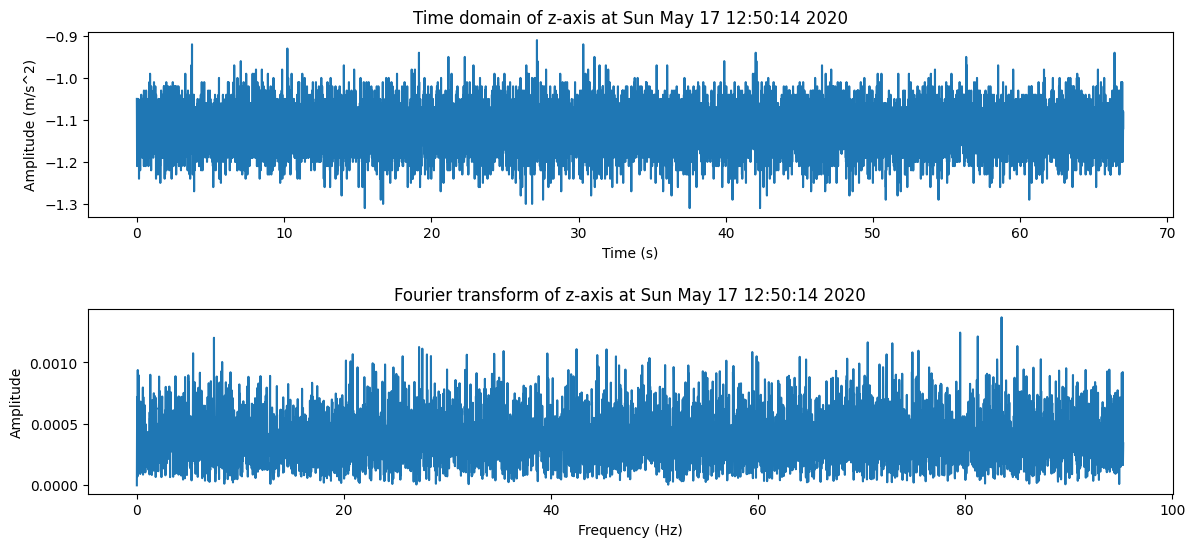

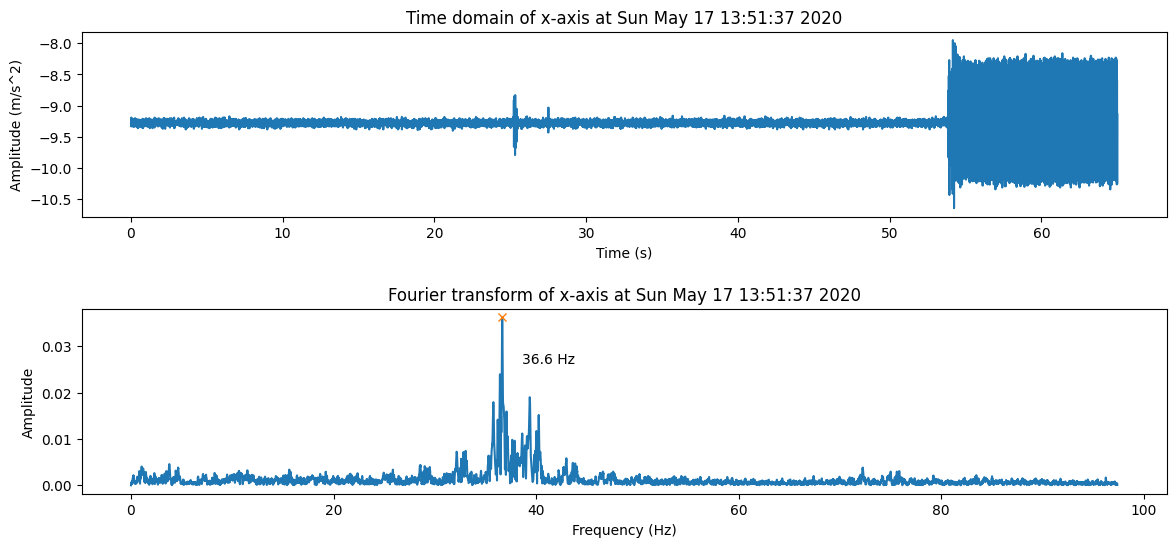

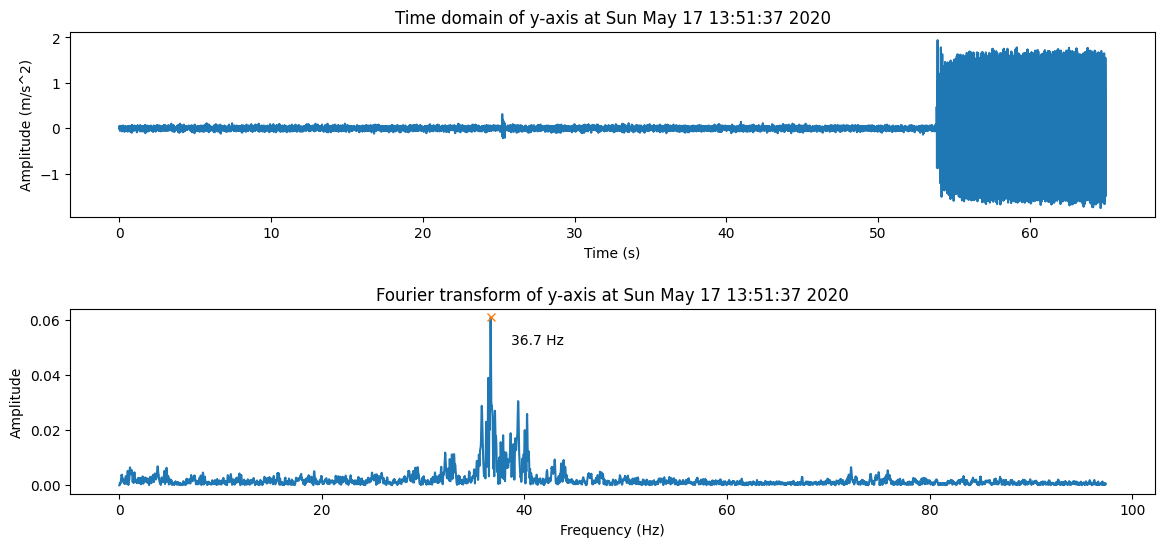

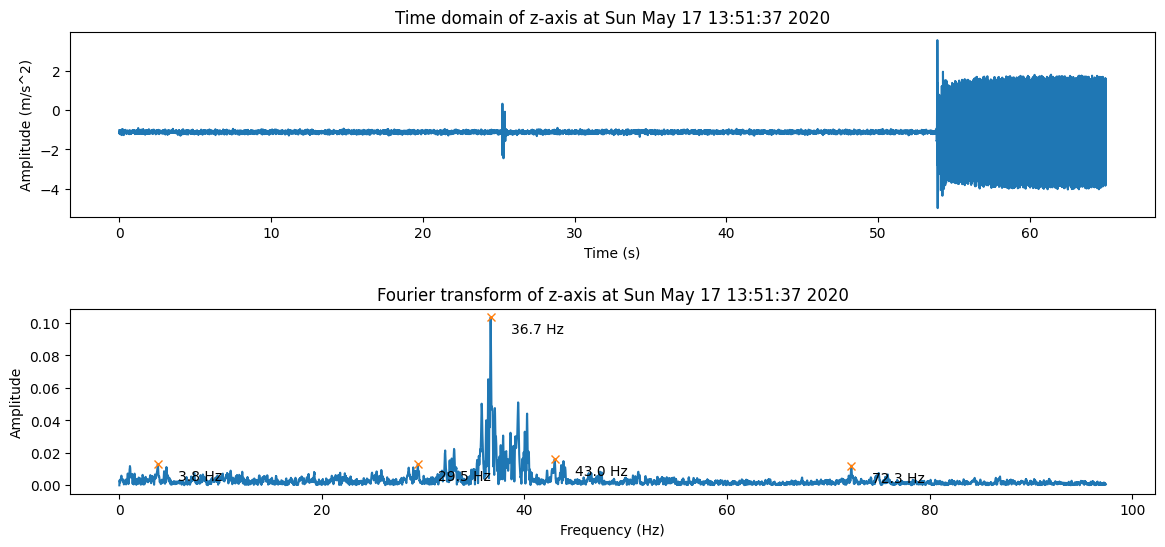

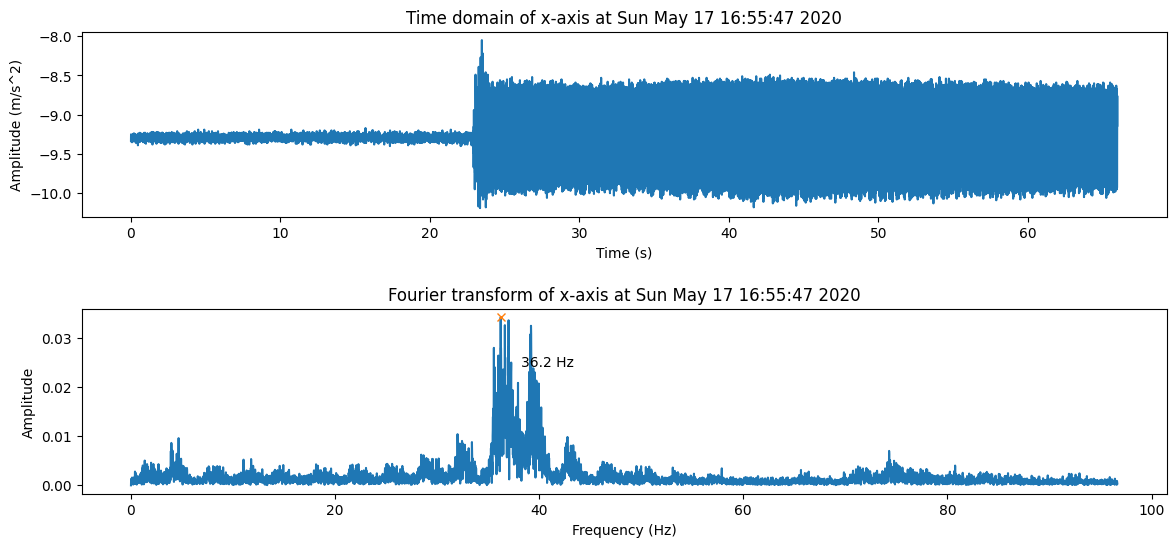

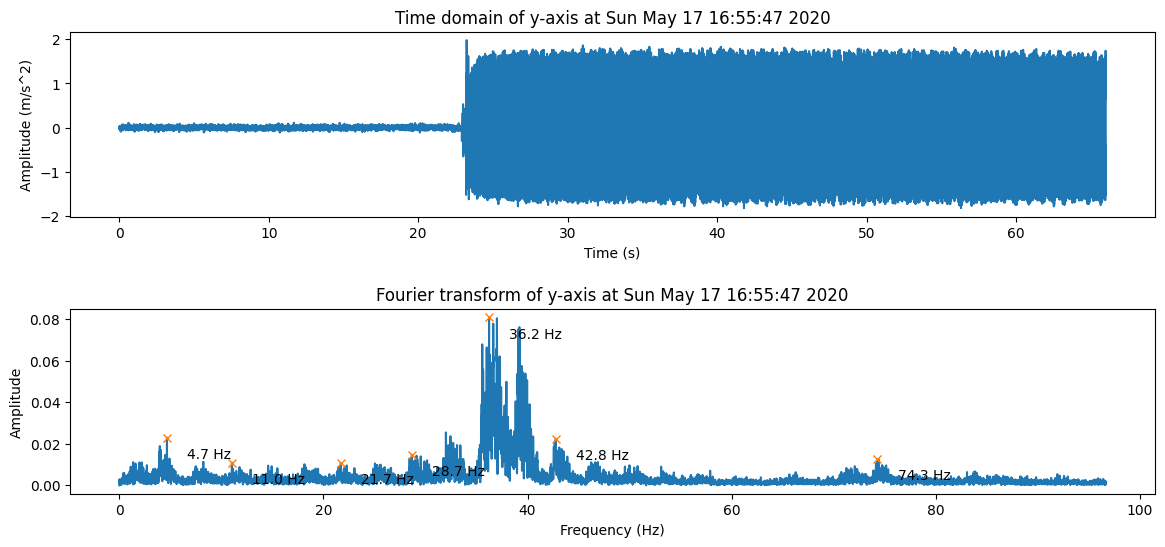

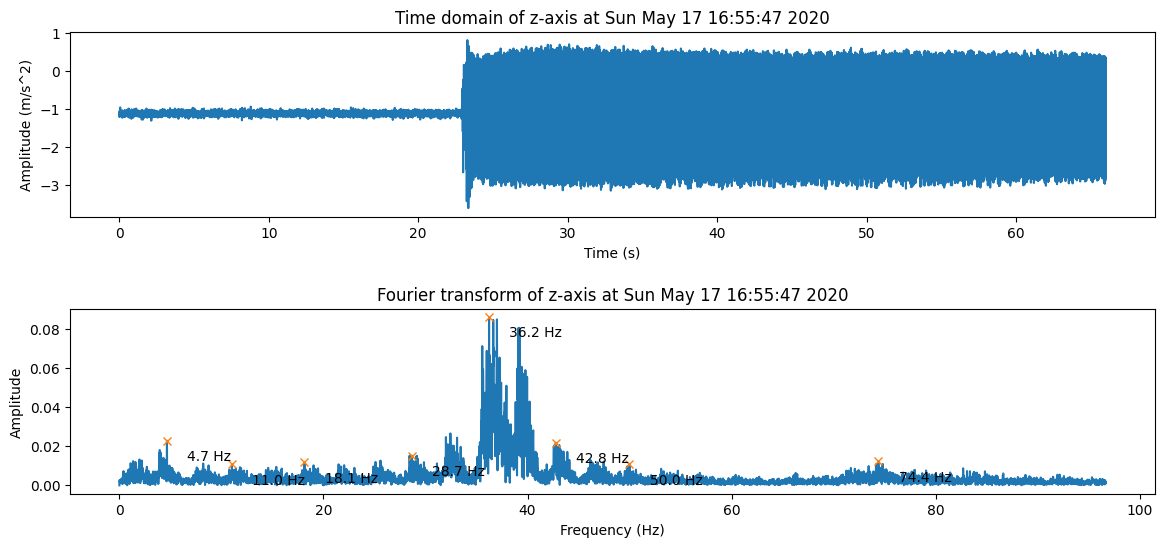

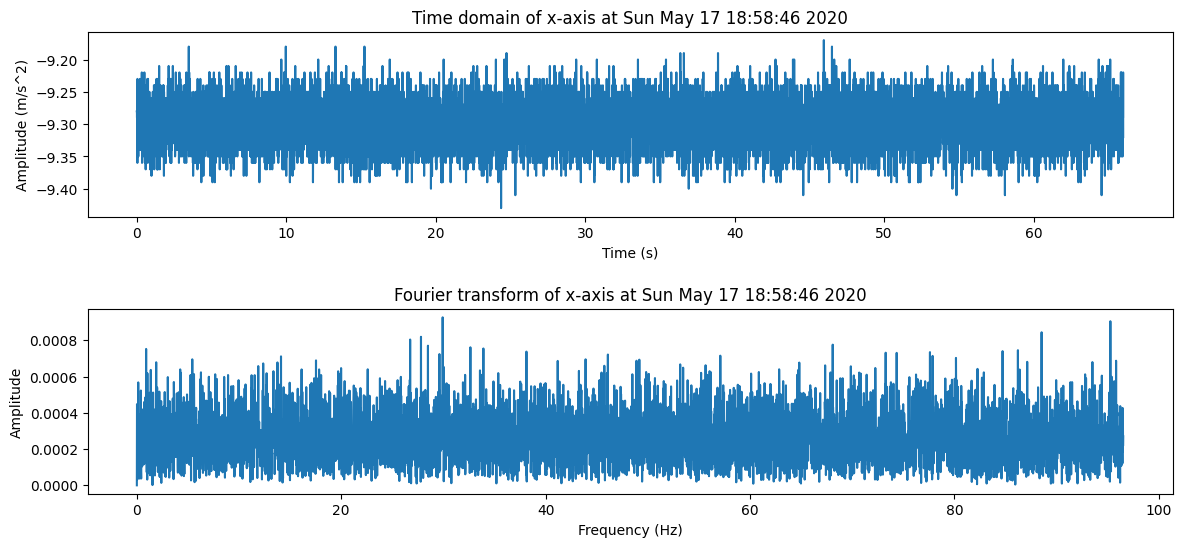

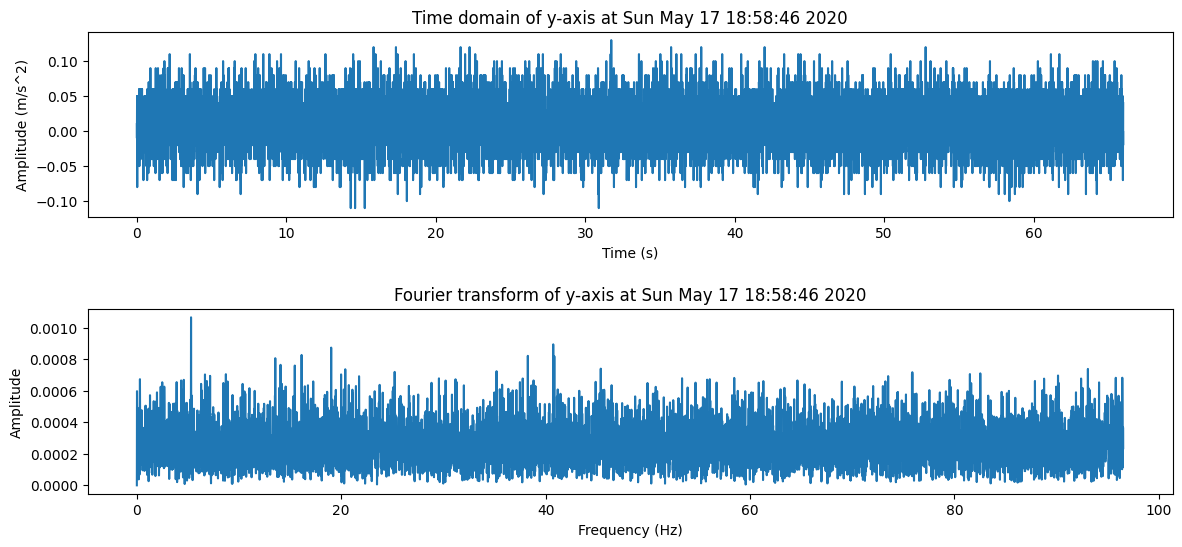

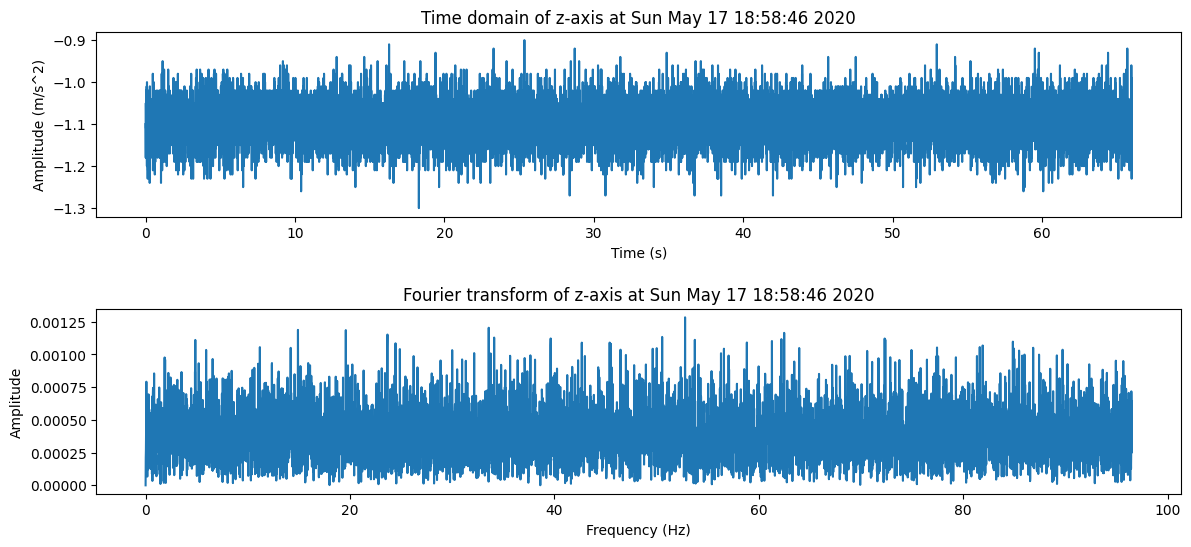

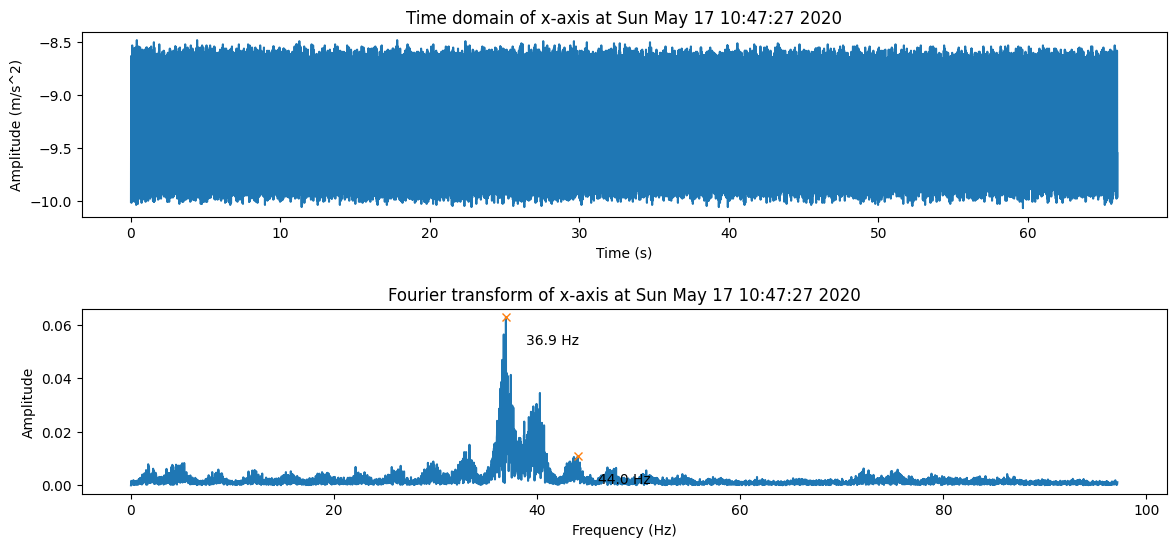

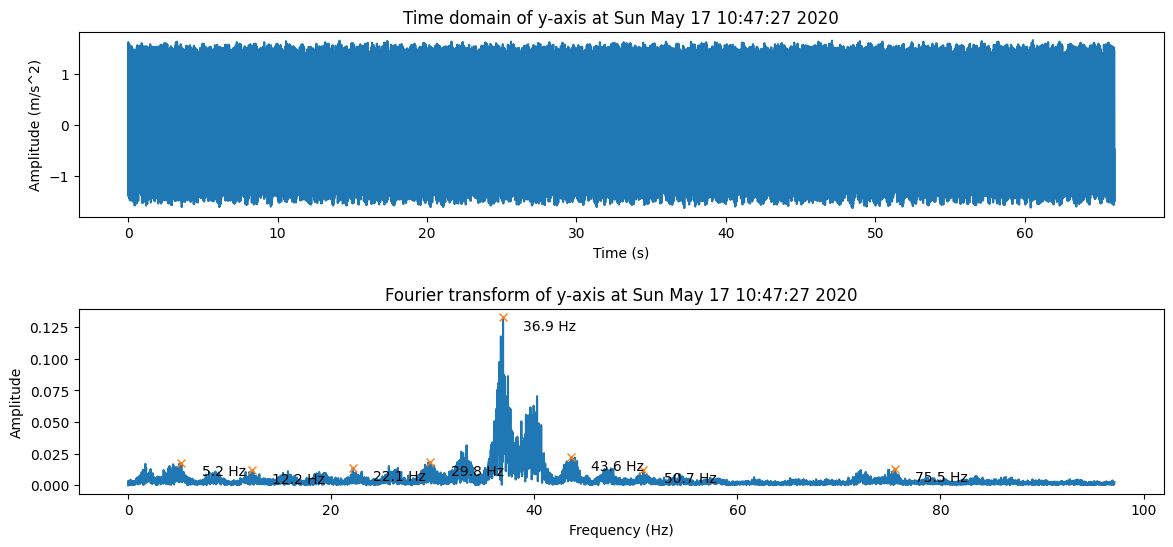

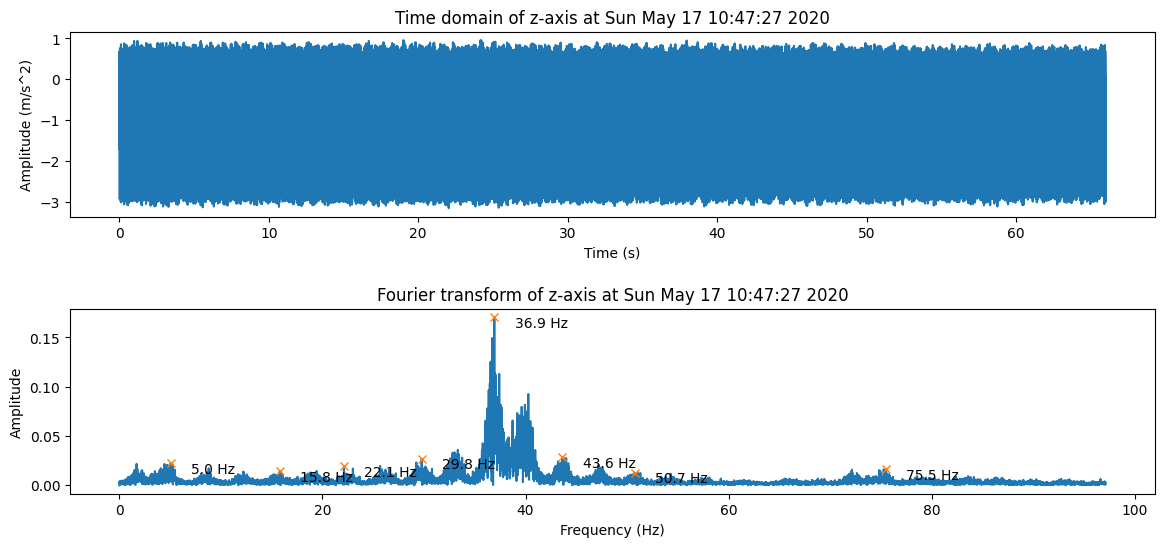

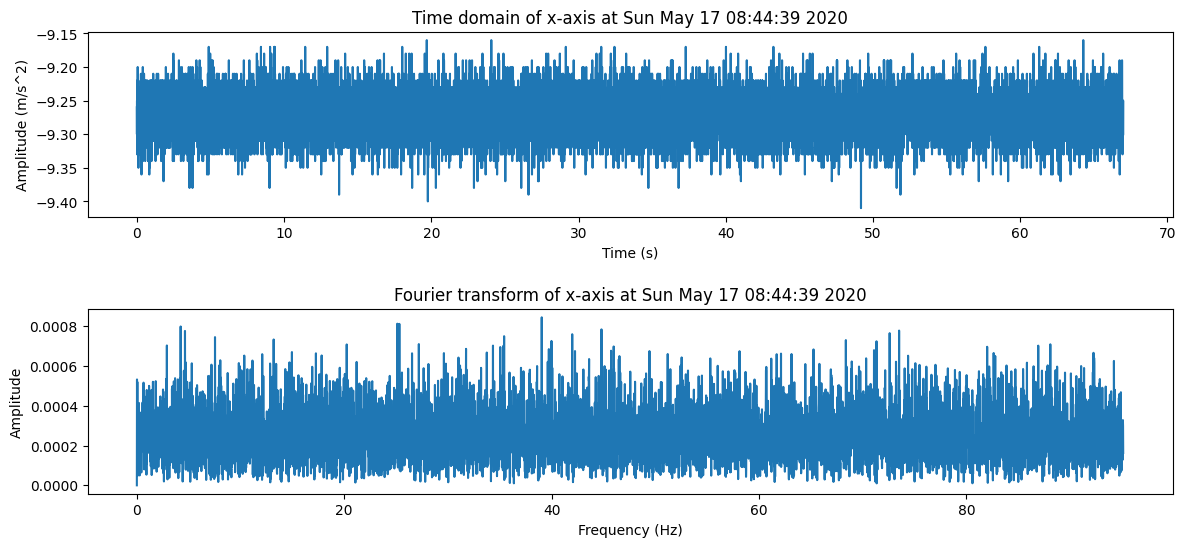

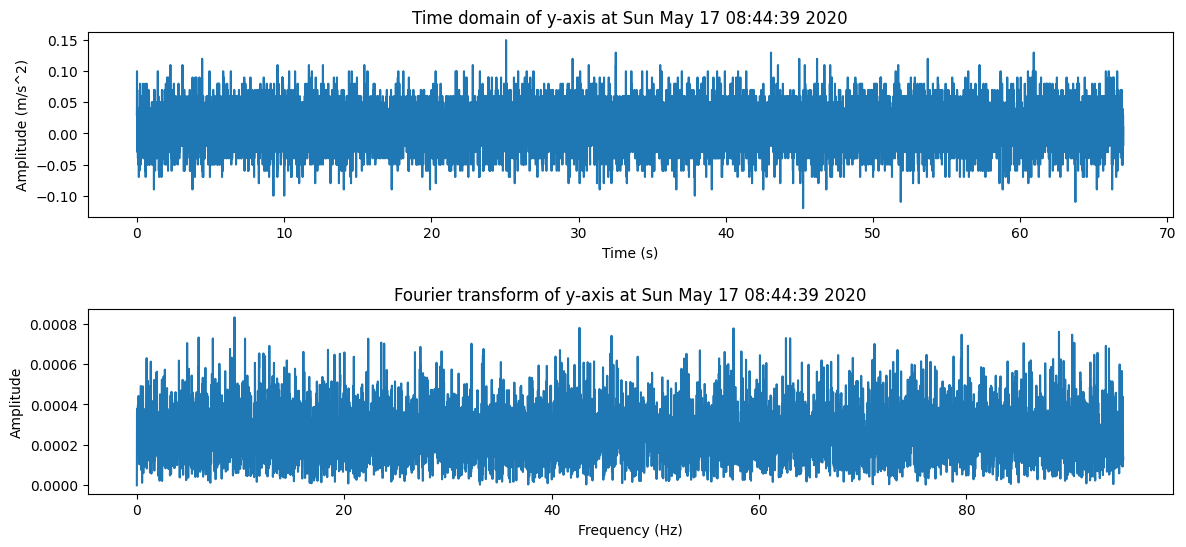

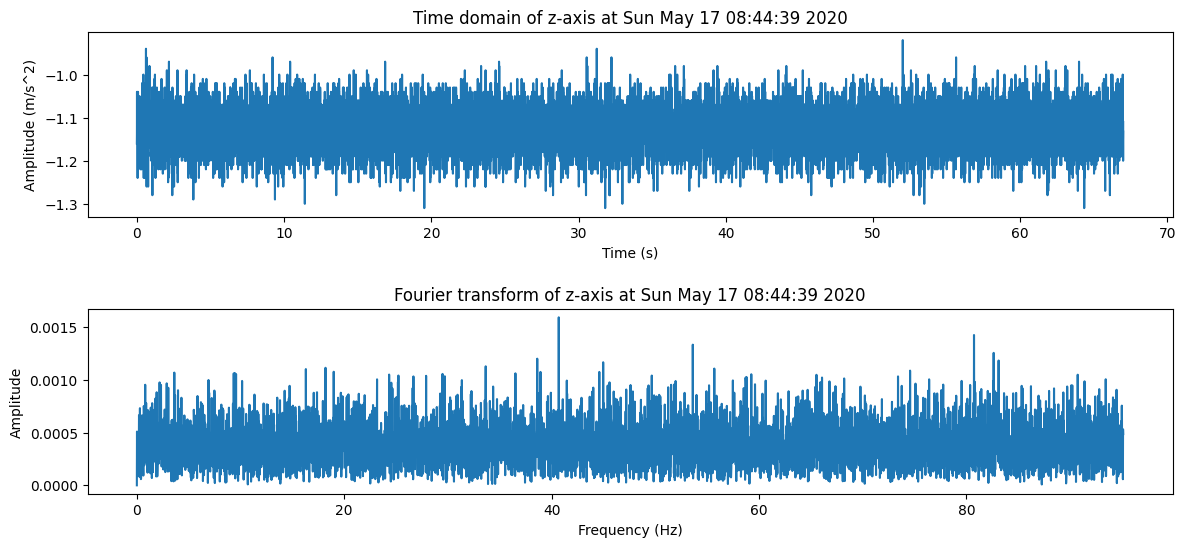

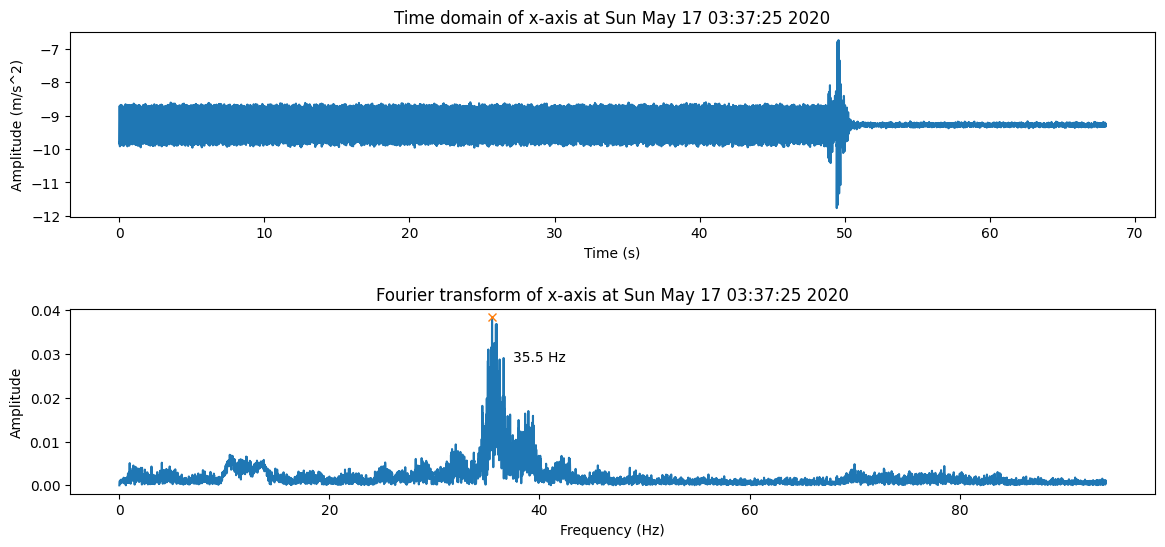

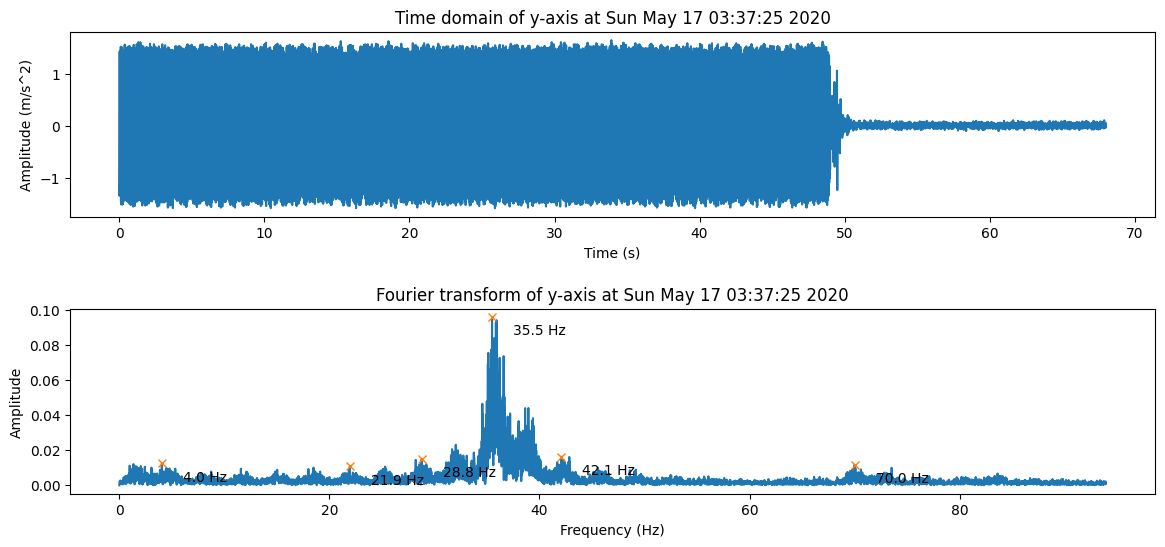

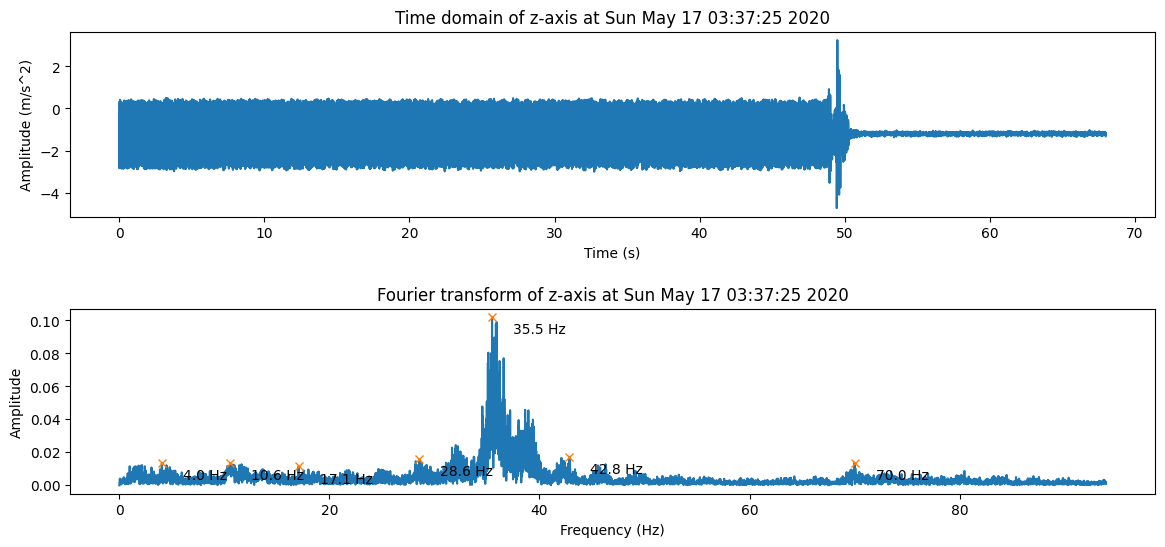

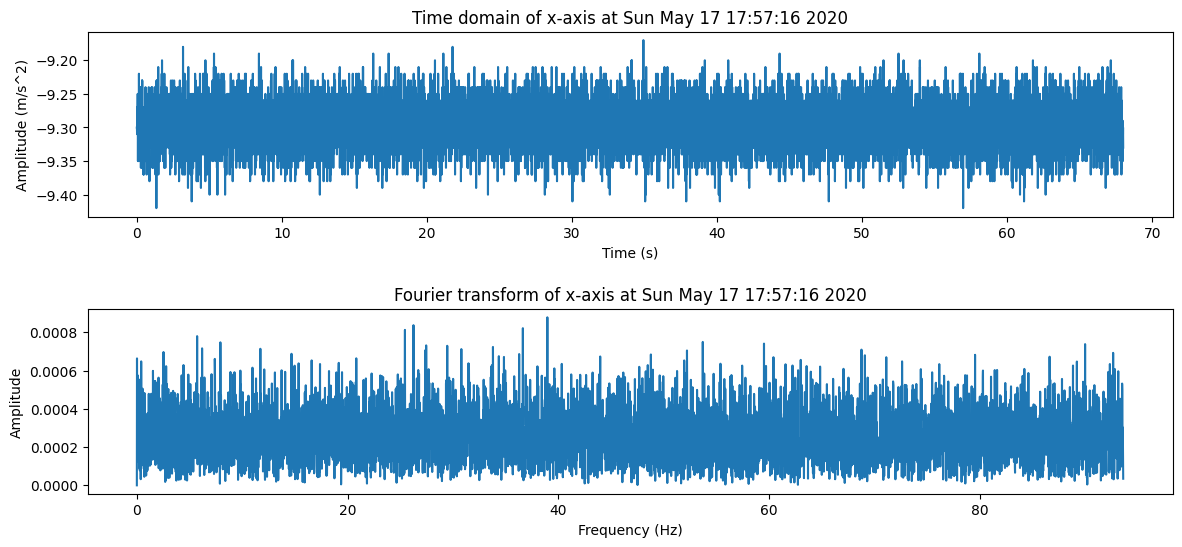

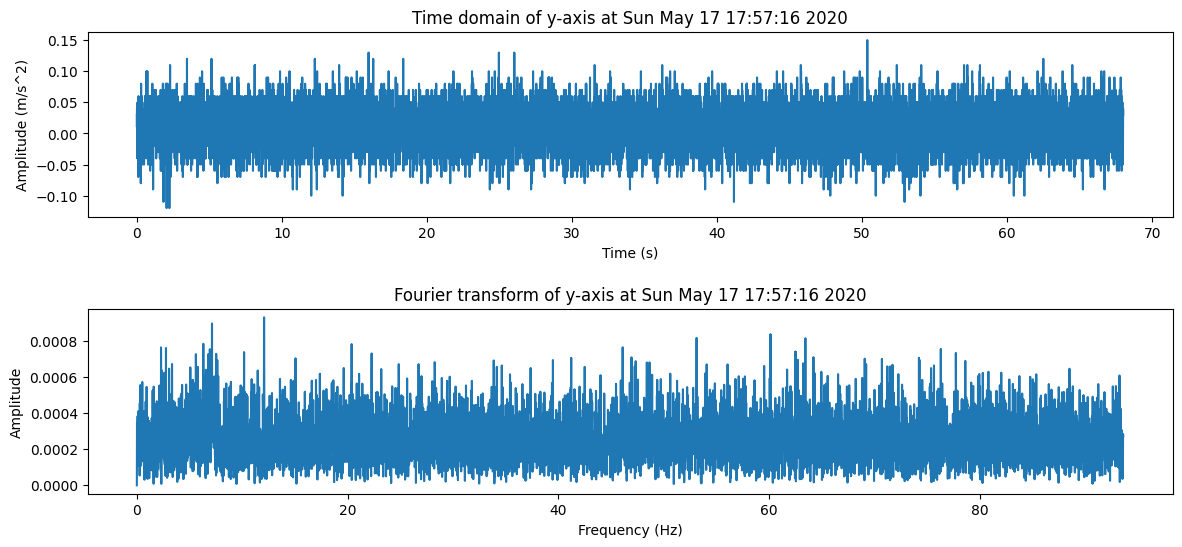

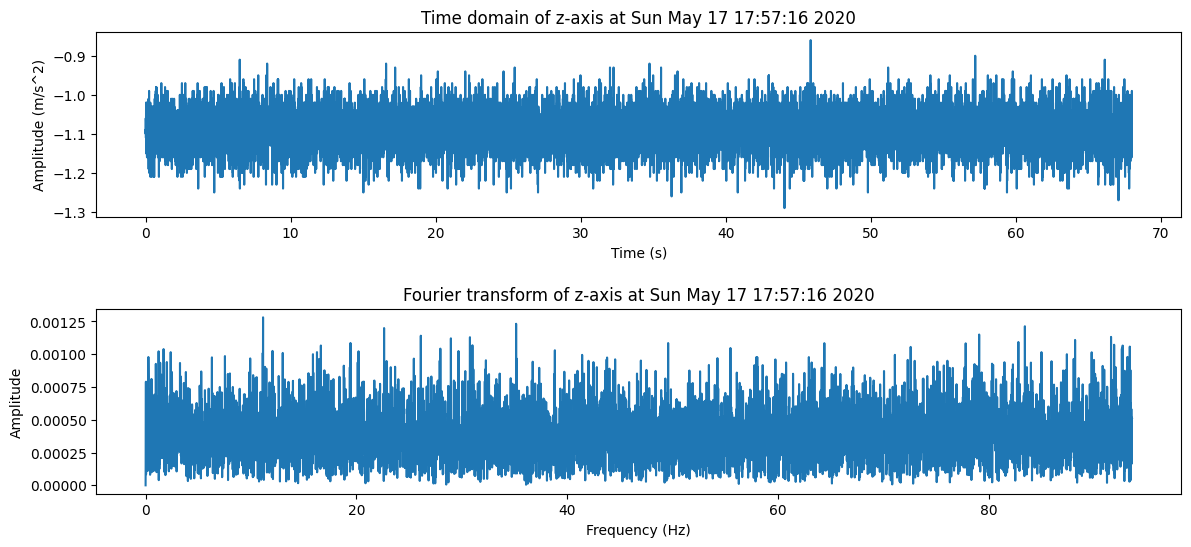

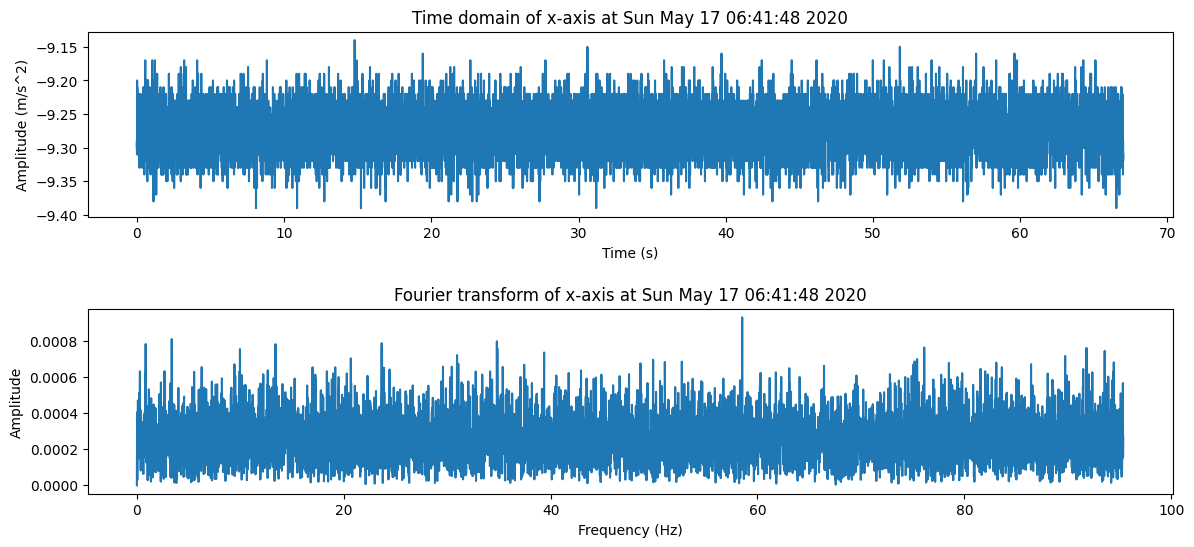

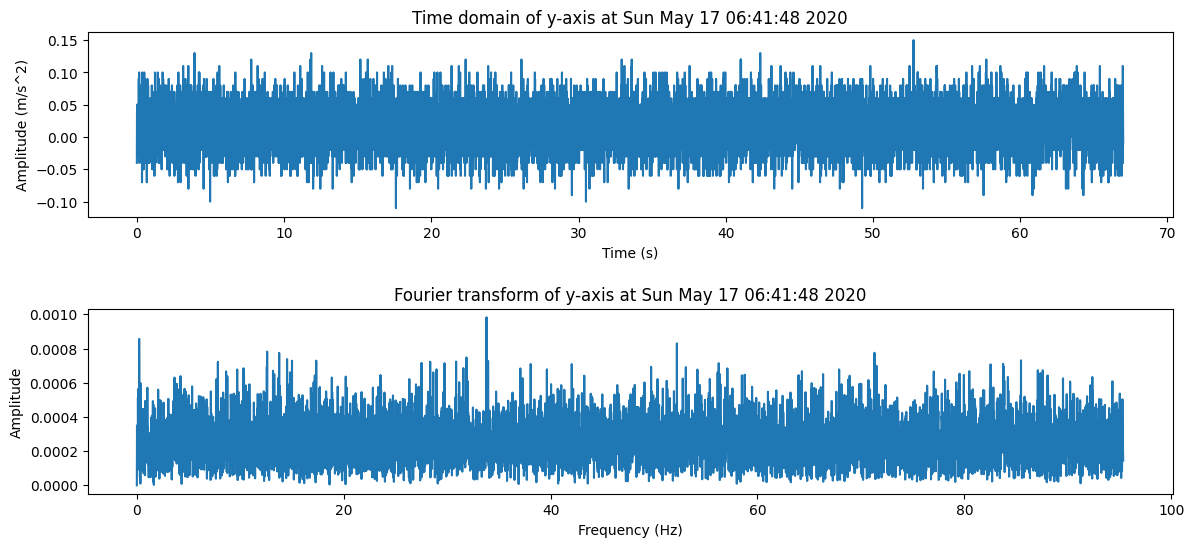

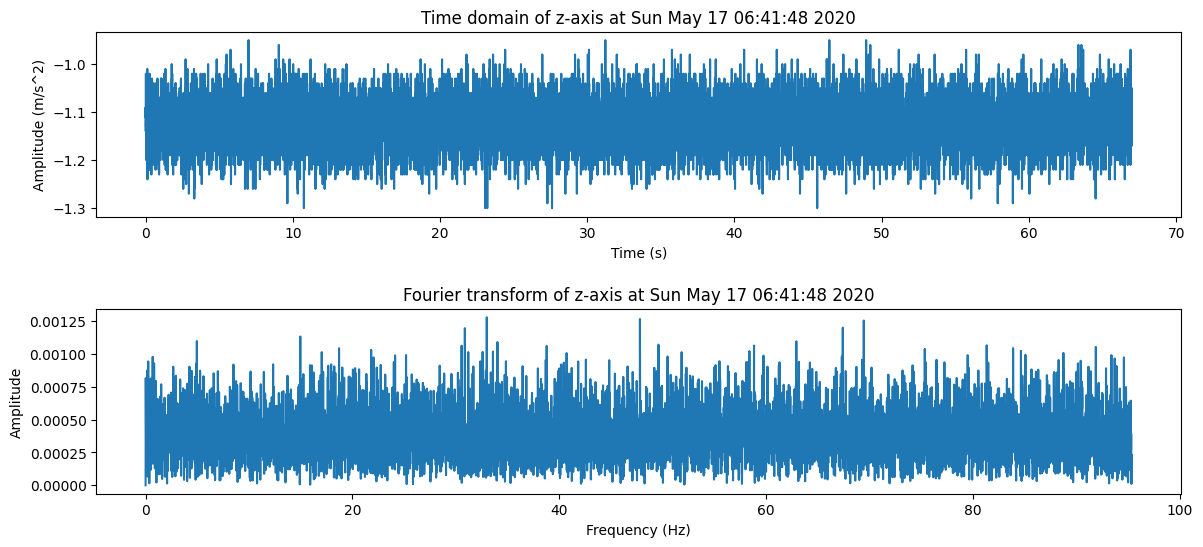

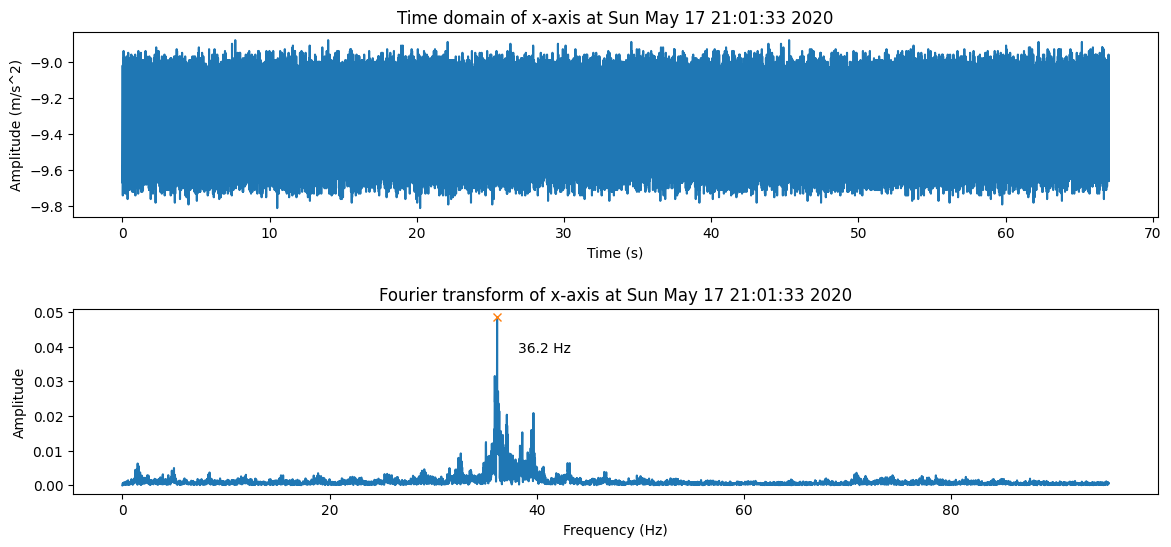

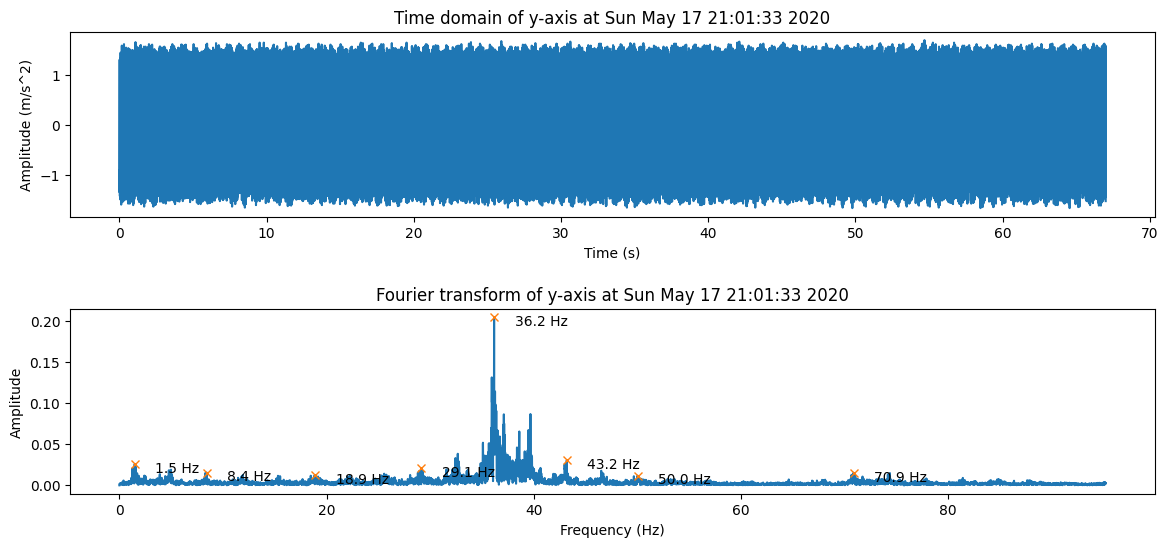

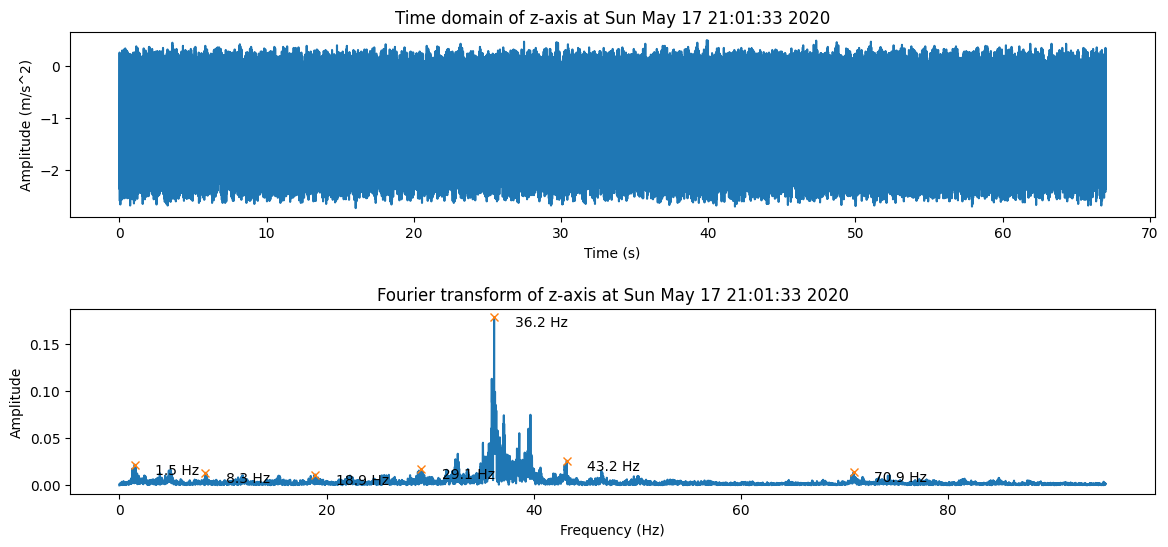

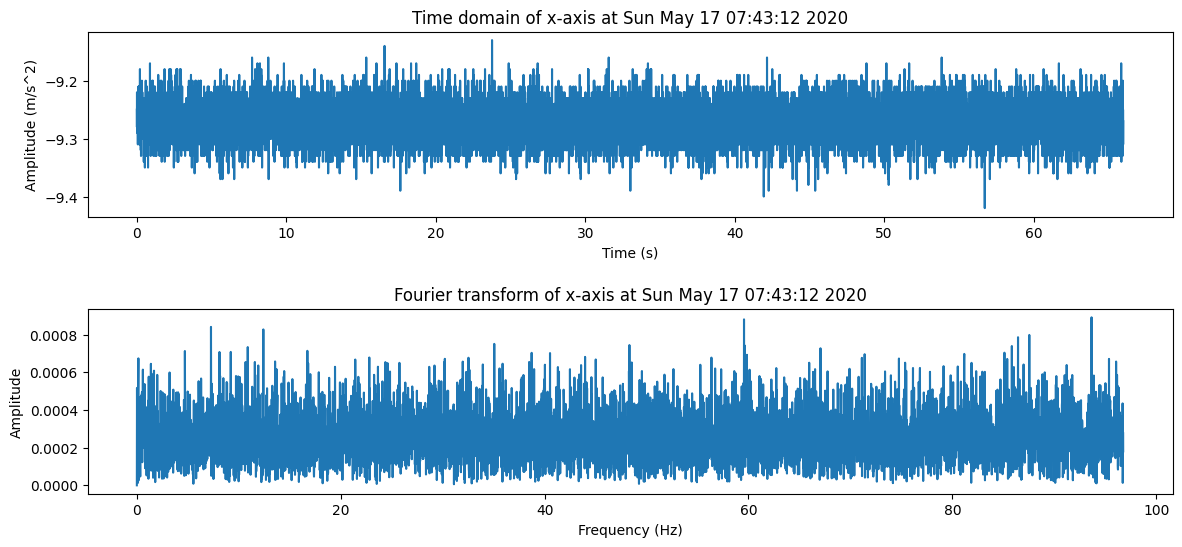

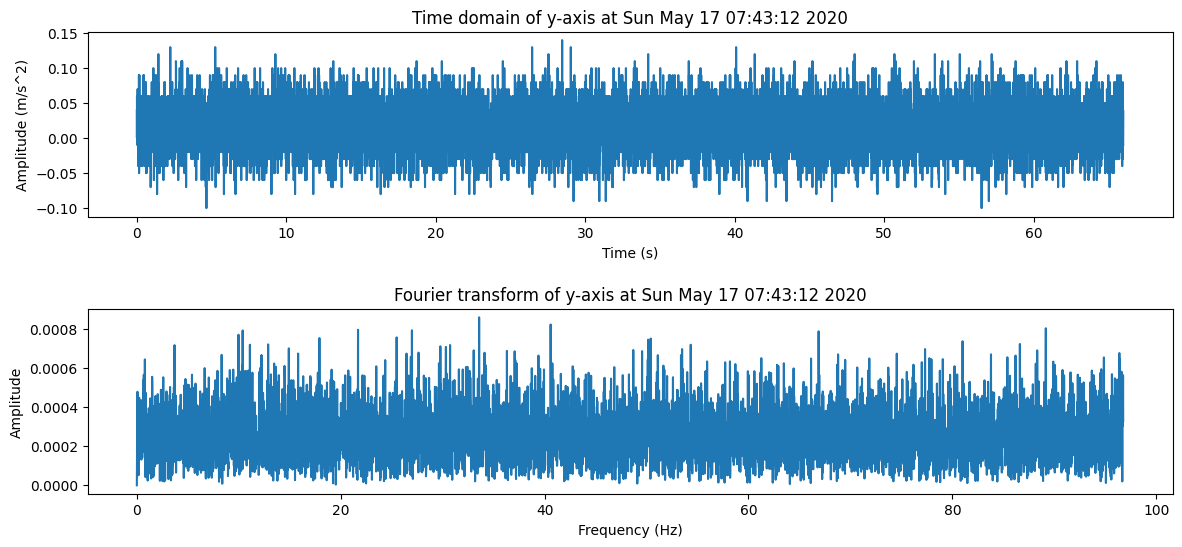

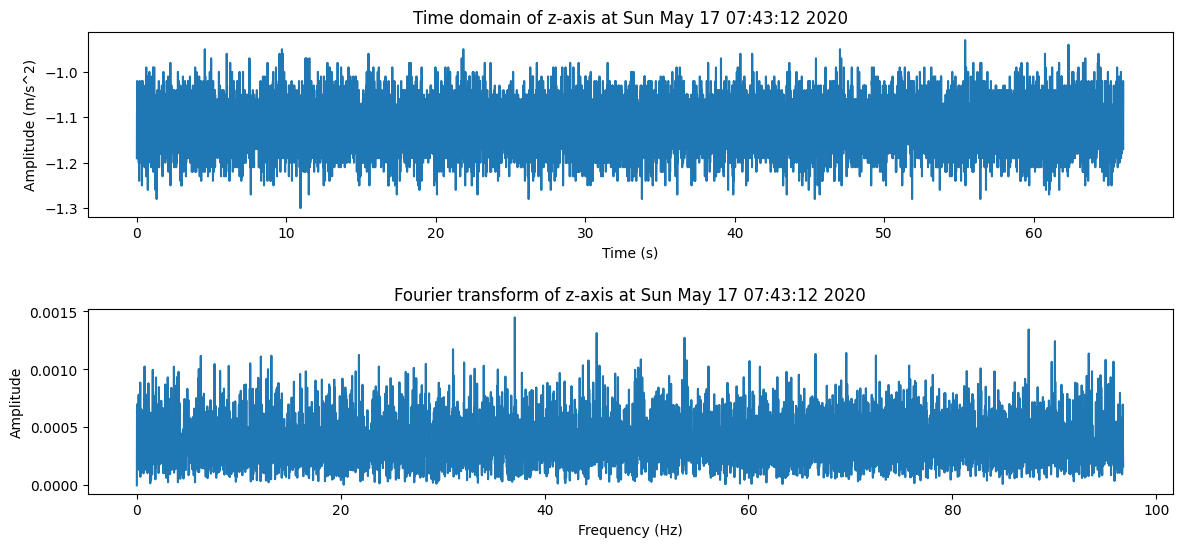

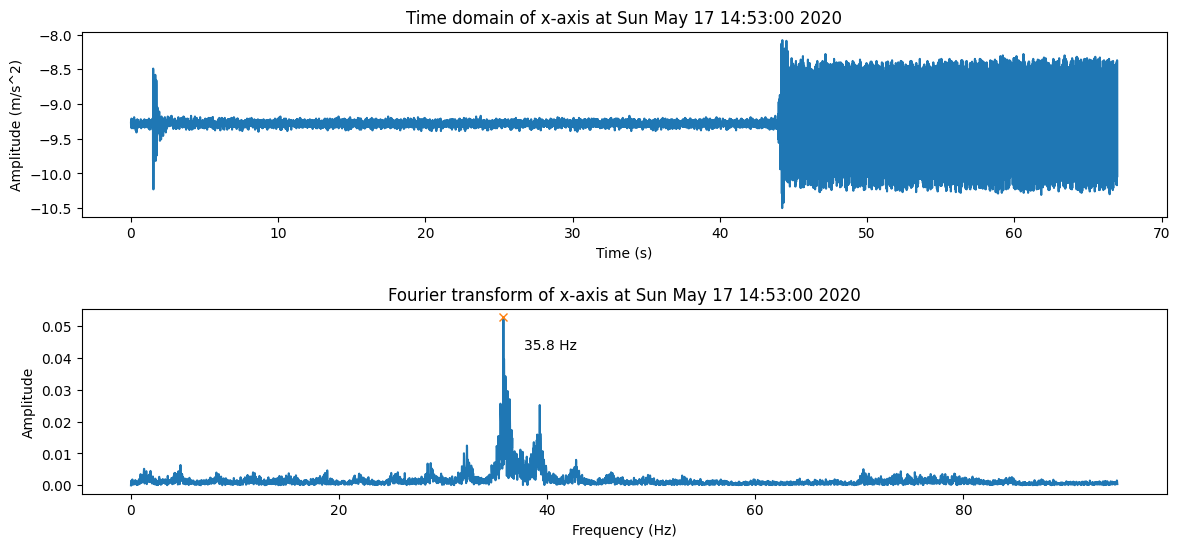

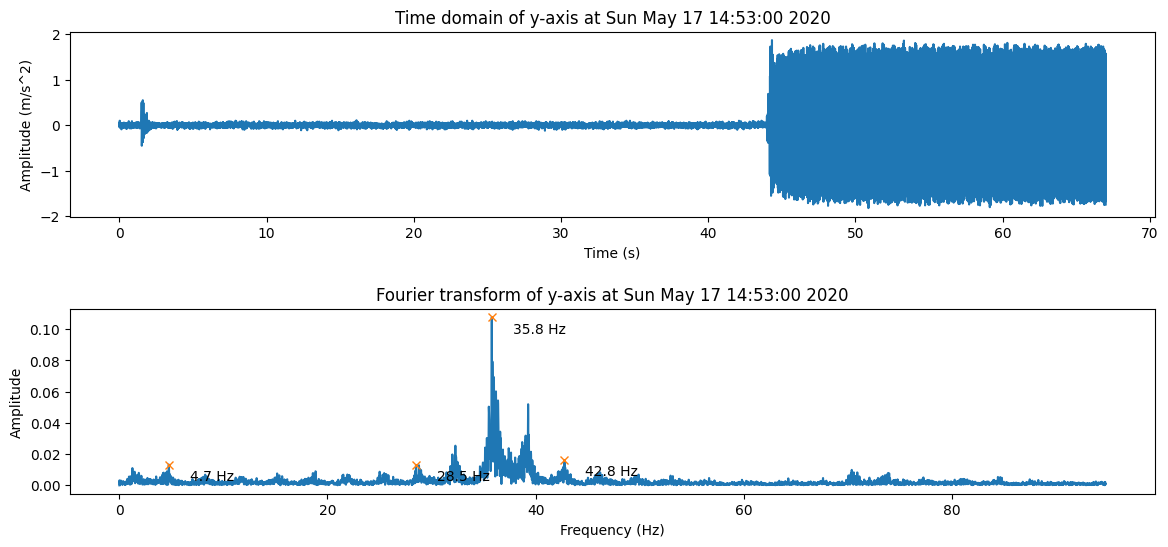

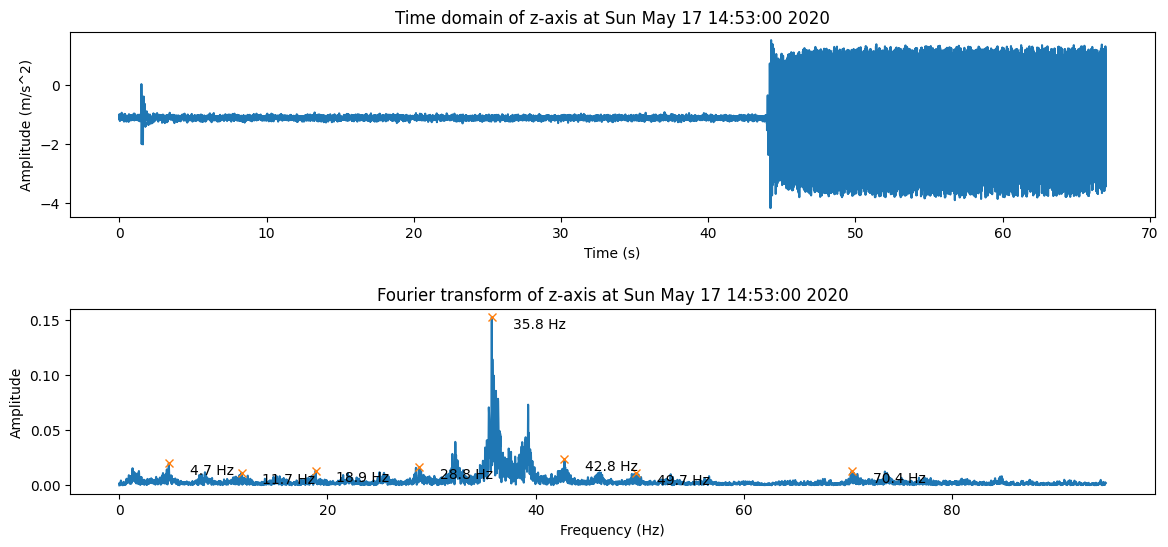

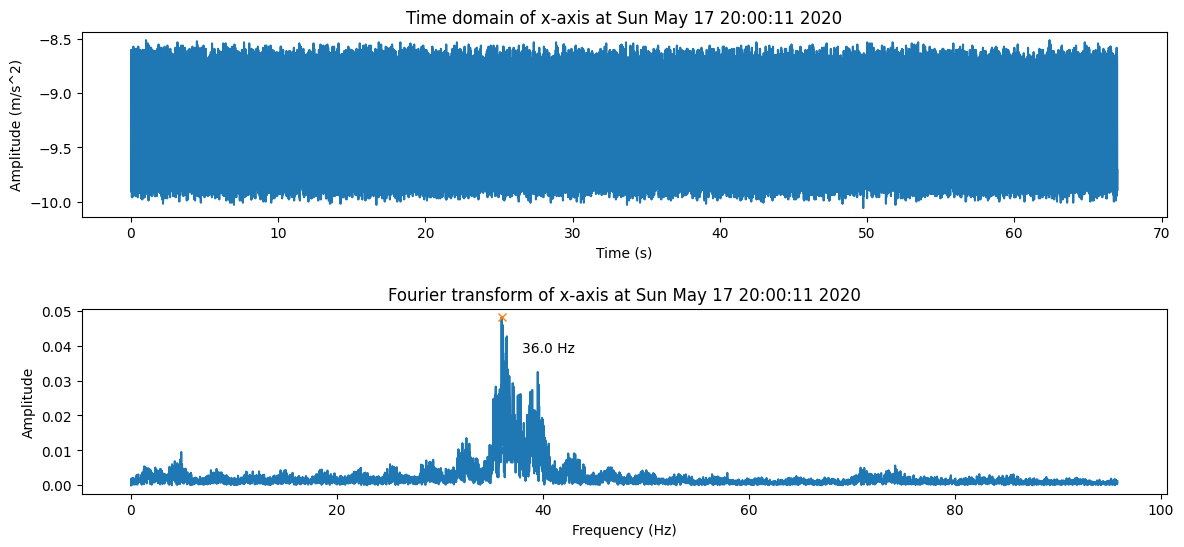

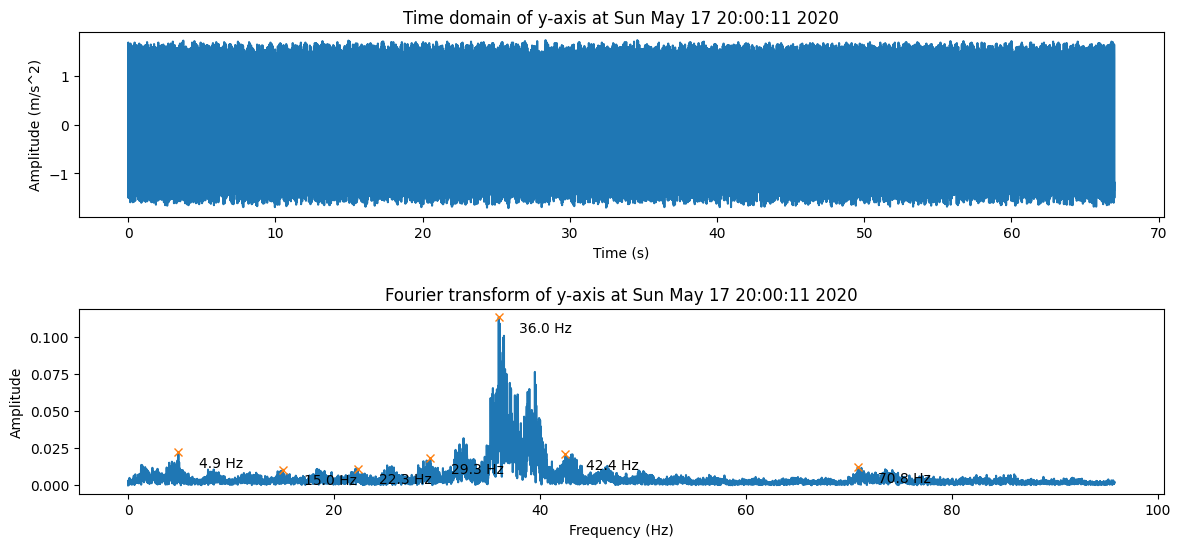

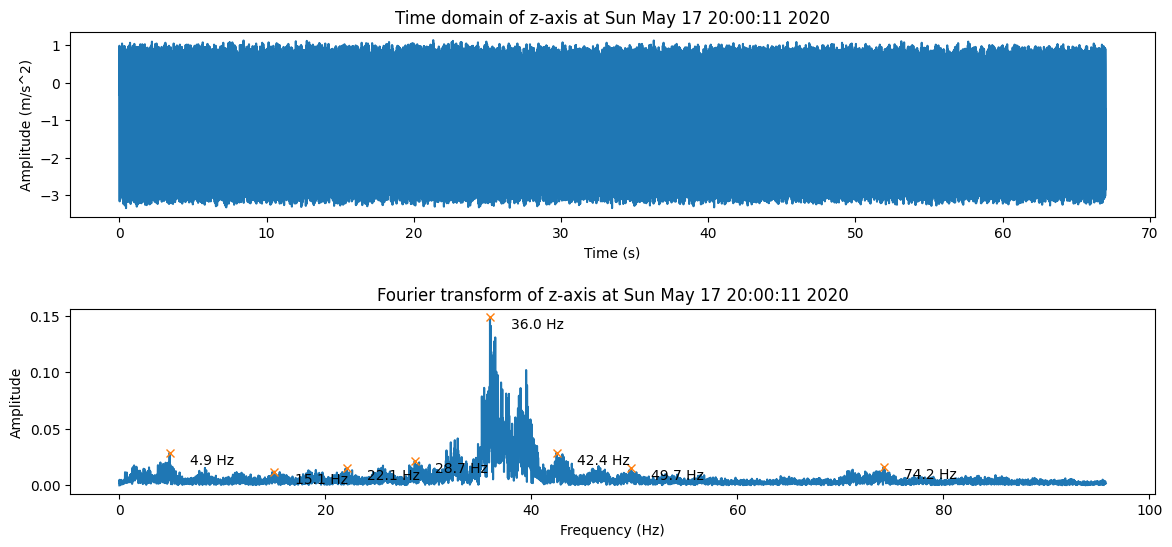

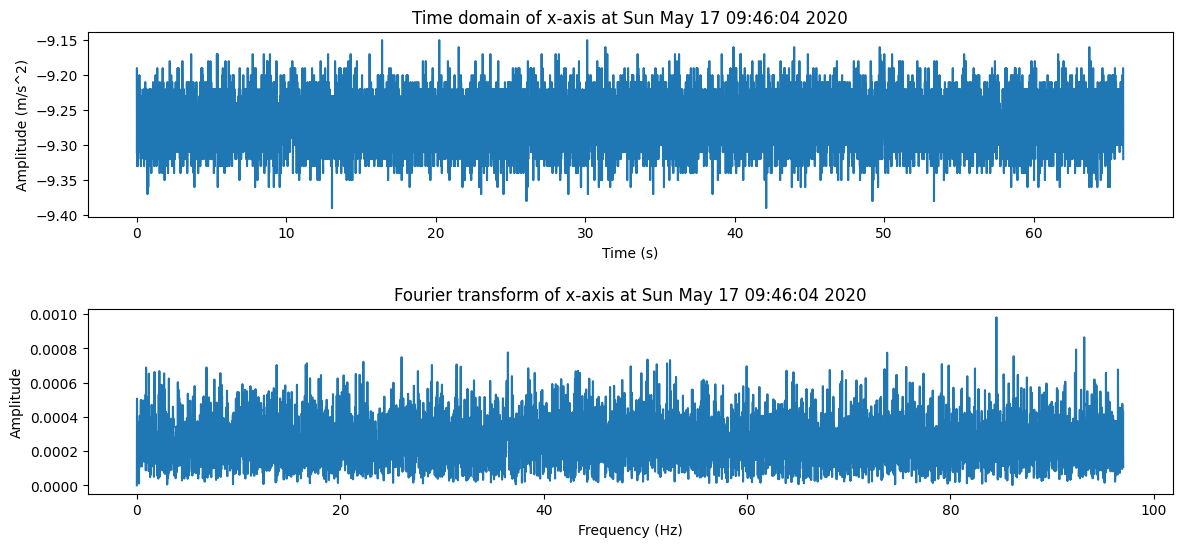

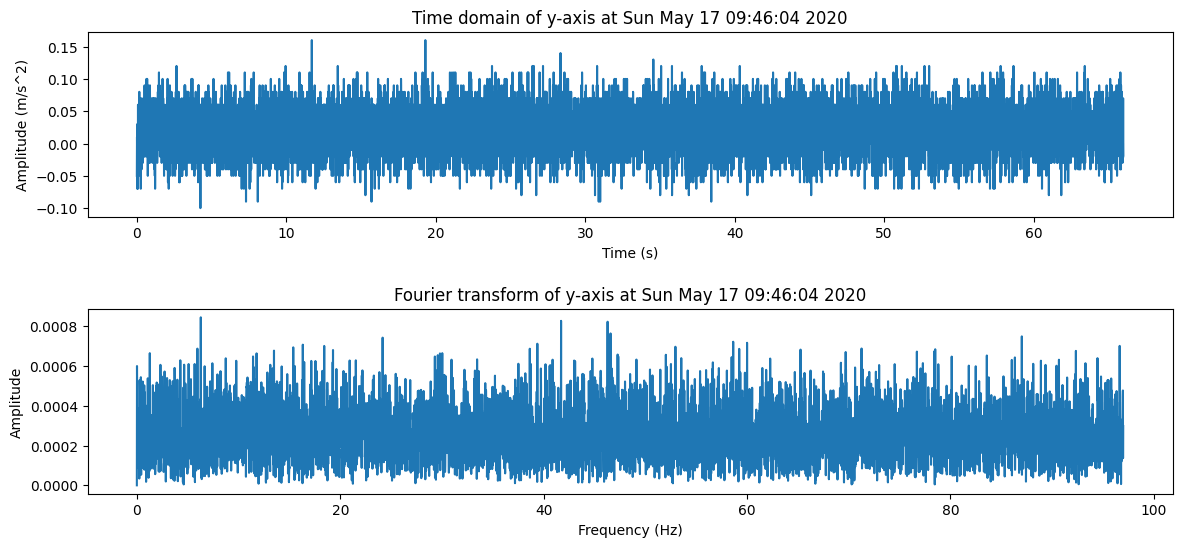

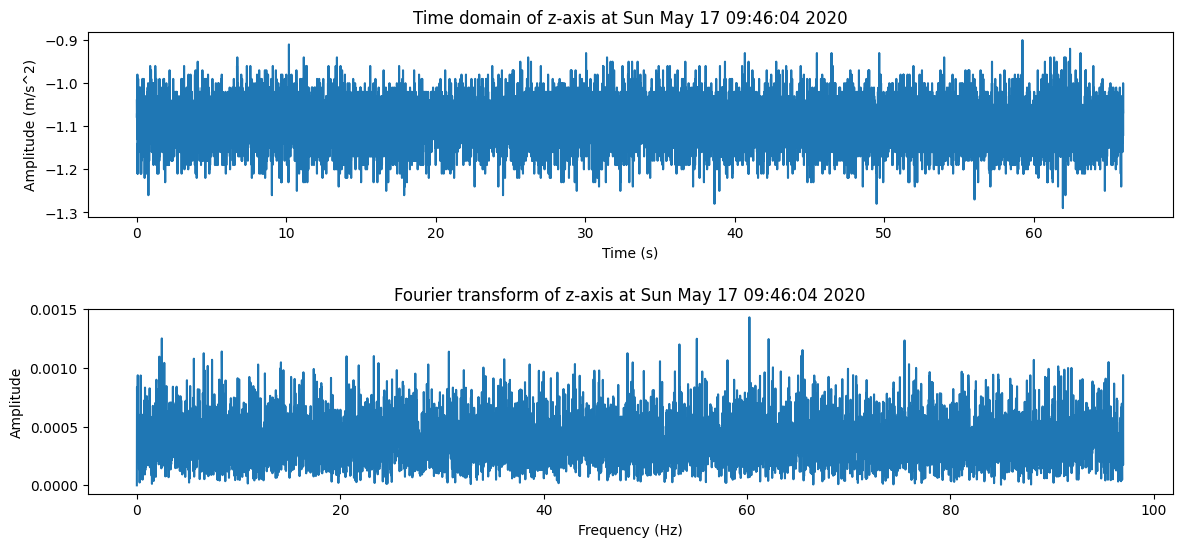

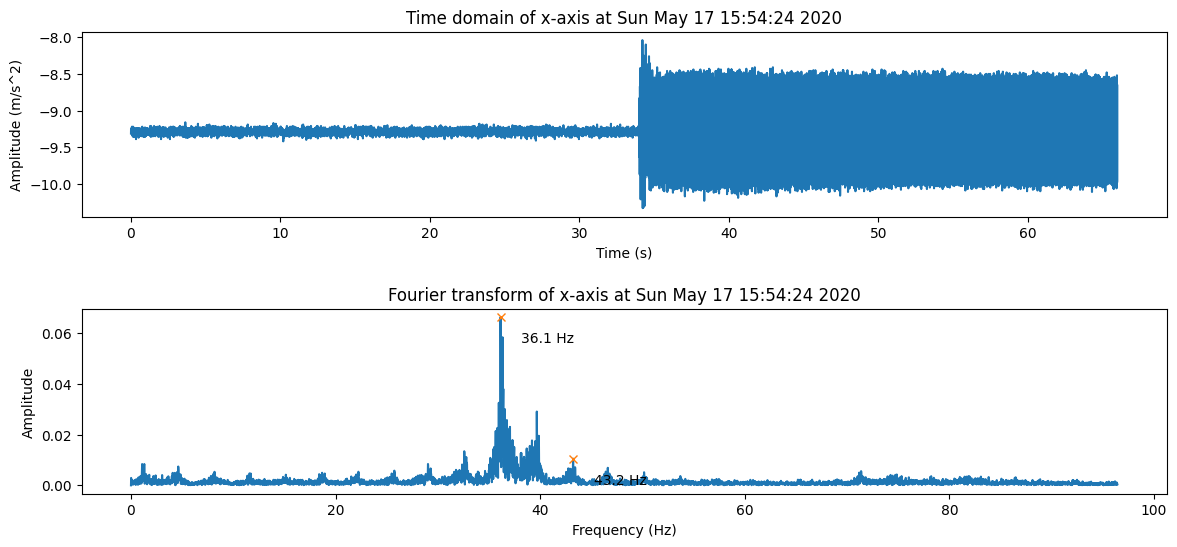

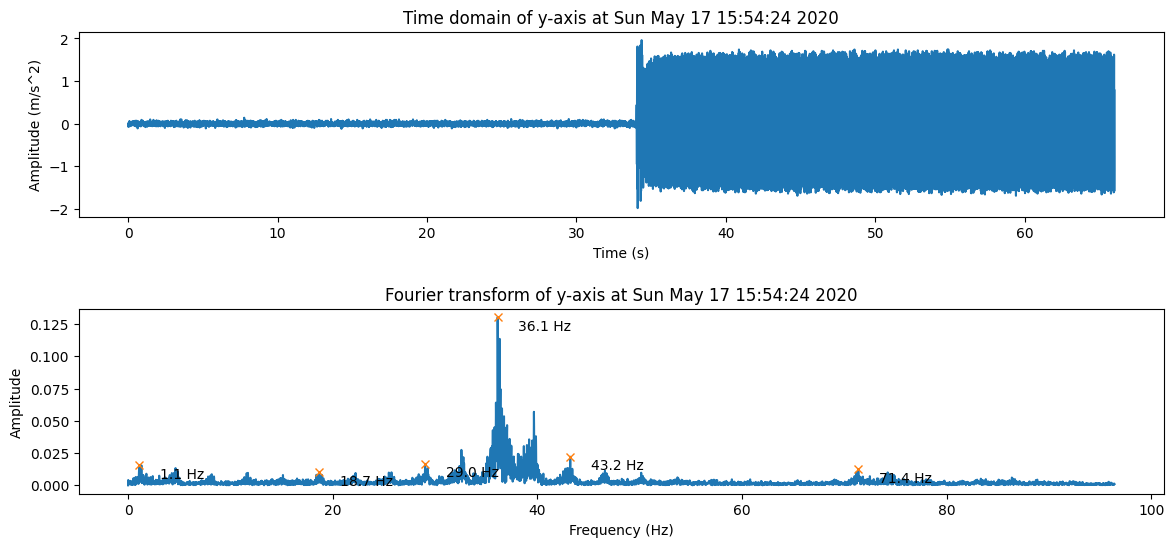

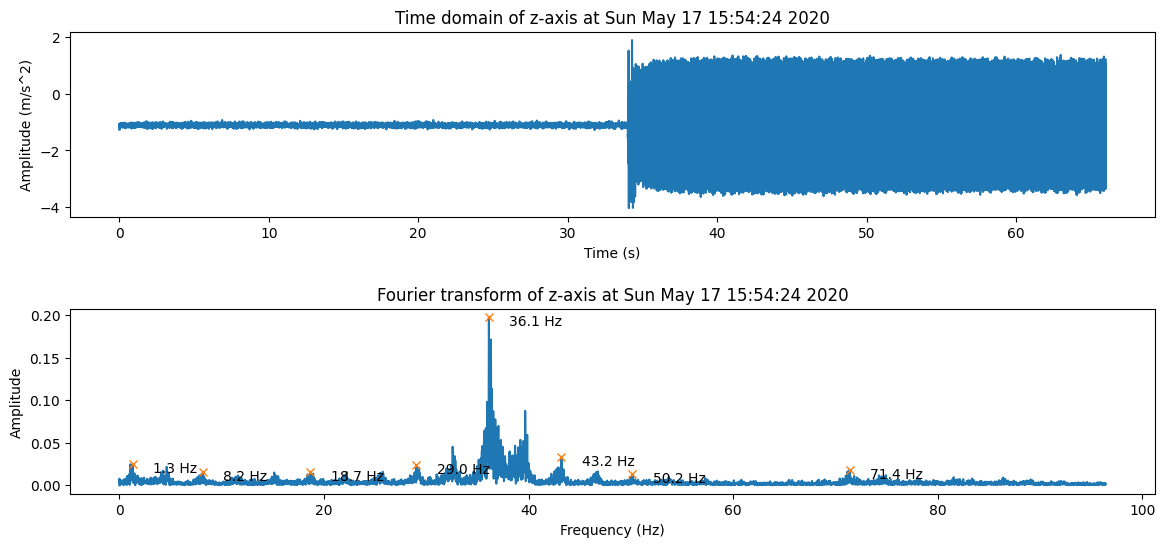

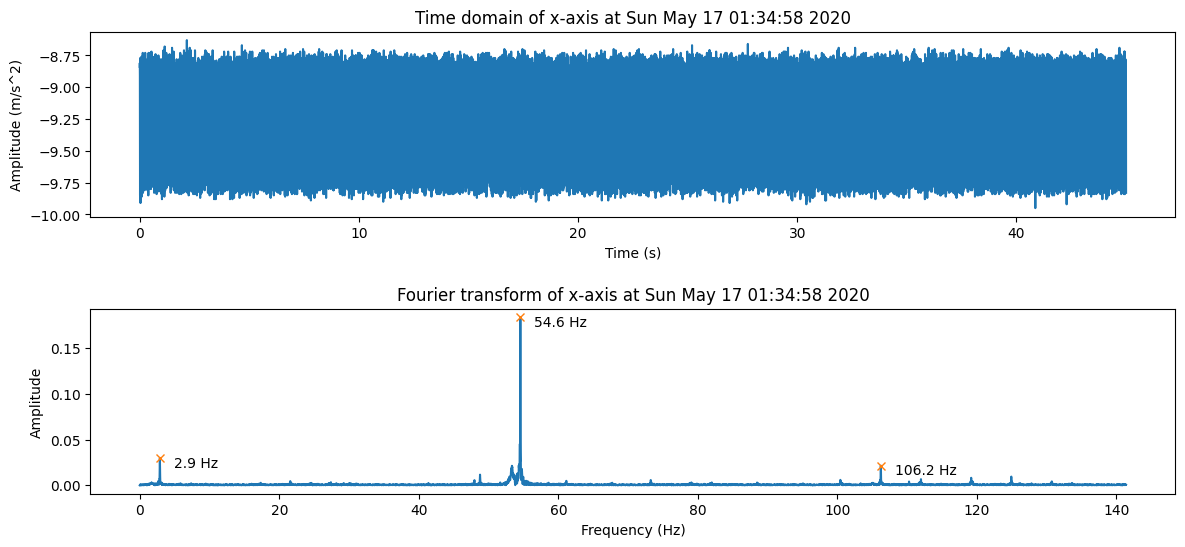

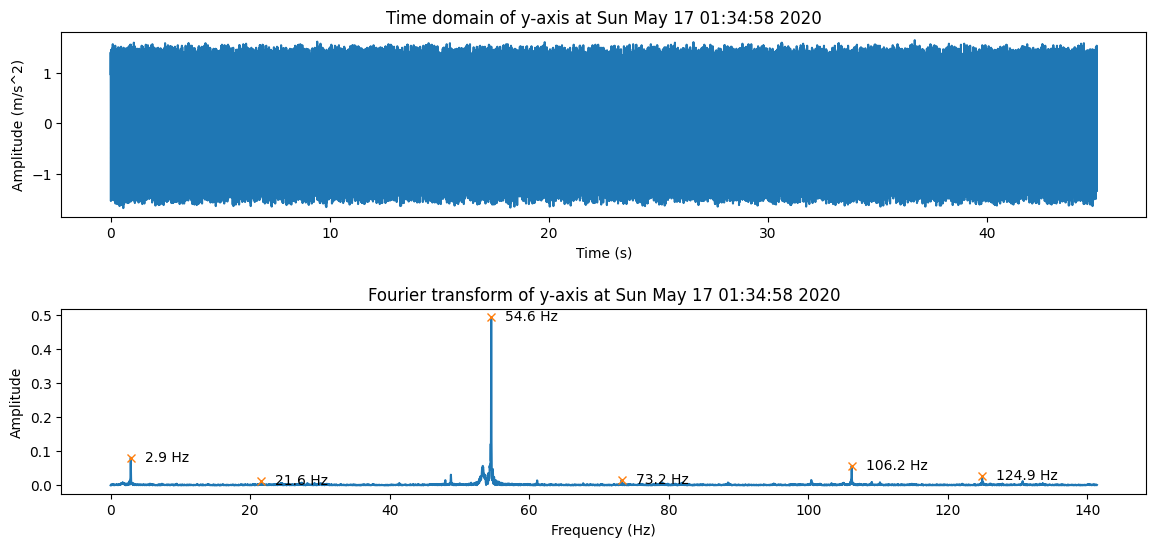

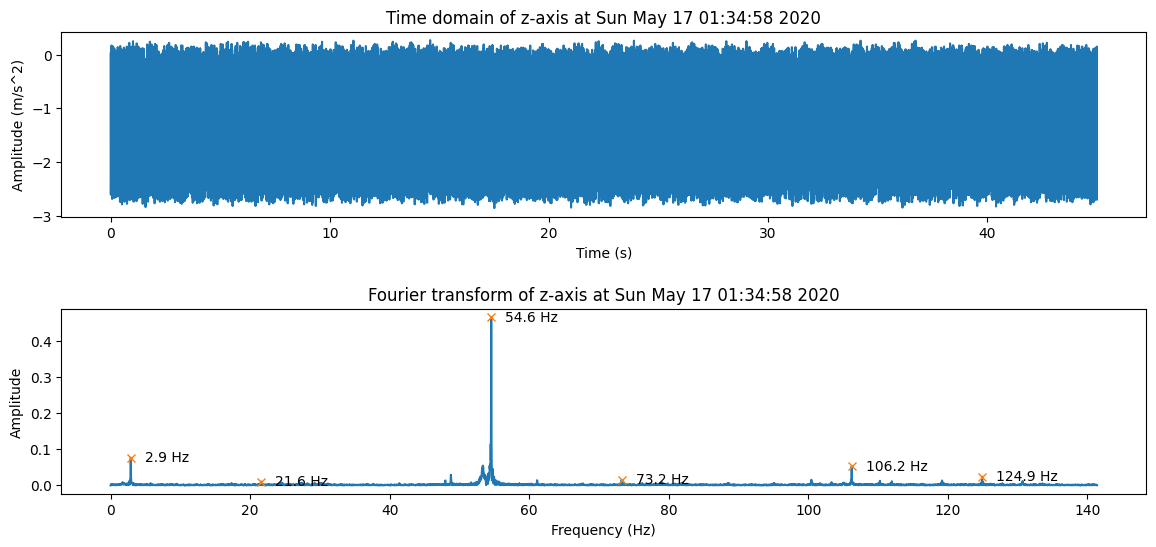

In [ ]:
data_dir = "/content/drive/MyDrive/Dataset"
time_string = len(data_dir) + 1

for doc in os.listdir(data_dir):
    address = os.path.join(data_dir, doc)
    if address.endswith('.csv'):

        # extracting collection's start and end time from the name of the file
        time1 = float(address[time_string:time_string+10])
        time2 = float(address[time_string+11:time_string+22])

        # importing the file with pandas
        df = pd.read_csv(address, names=["x","y","z","c"], sep=",",dtype={"x": np.float32, "y": np.float32, "z": np.float32, "c": np.float32})

        # defining the time of each measurement (assuming equal spacing between measurements)
        time_points = df.shape[0]
        tm = np.linspace(0,time2-time1,time_points)

        # signals of the 3 directions
        x = df["x"].to_numpy()
        y = df["y"].to_numpy()
        z = df["z"].to_numpy()

        # calling time_freq_plot() for calculation and plotting of the x-series
        ampl1 = x
        axis = 'x'
        smpl_freq = len(ampl1)/(time2-time1)
        time_freq_plot(tm, ampl1, smpl_freq, axis, time1)

        # calling time_freq_plot() for calculation and plotting of the y-series
        ampl1 = y
        axis = 'y'
        smpl_freq = len(ampl1)/(time2-time1)
        time_freq_plot(tm, ampl1, smpl_freq, axis, time1)

        # calling time_freq_plot() for calculation and plotting of the z-series
        ampl1 = z
        axis = 'z'
        smpl_freq = len(ampl1)/(time2-time1)
        time_freq_plot(tm, ampl1, smpl_freq, axis, time1)

**FINDING OUT FILES WITH ANOMALY**

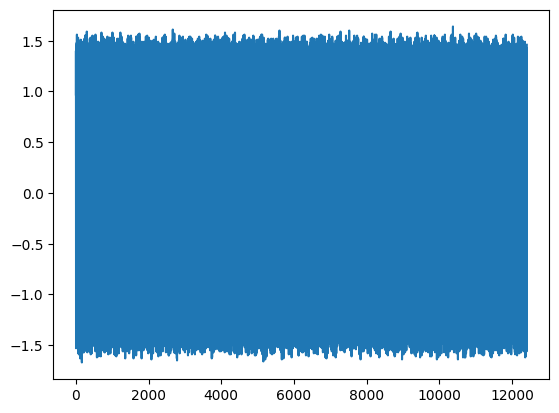

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/1589679298-1589679343.csv', names=["x","y","z","c"], sep=",",dtype={"x": np.float32, "y": np.float32, "z": np.float32, "c": np.float32})
df=df.drop(['x','z','c'], axis=1)
trial=np.array(df)
trial=trial[:12408]
plt.plot(trial)
plt.show()

Above has no anomaly

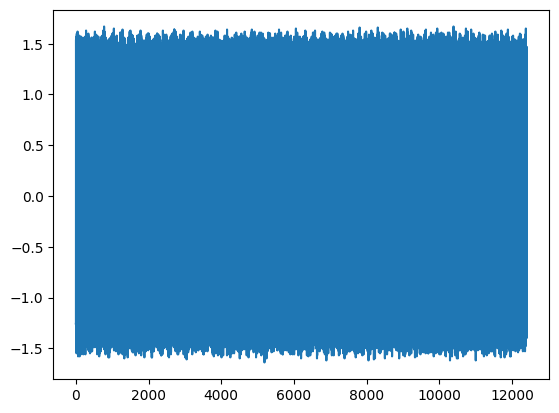

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/1589682974-1589683028.csv', names=["x","y","z","c"], sep=",",dtype={"x": np.float32, "y": np.float32, "z": np.float32, "c": np.float32})
df=df.drop(['x','z','c'], axis=1)
trial=np.array(df)
trial=trial[:12408]
plt.plot(trial)
plt.show()

Above has no anomaly

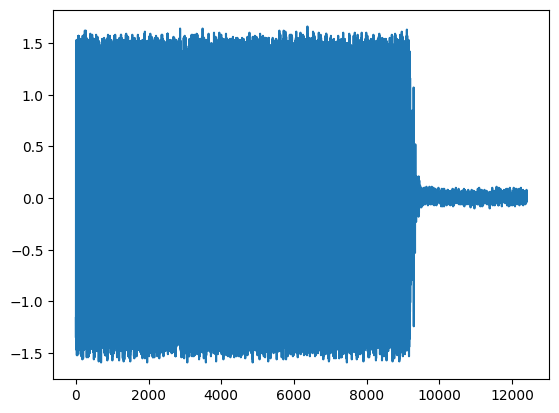

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/1589686645-1589686713.csv', names=["x","y","z","c"], sep=",",dtype={"x": np.float32, "y": np.float32, "z": np.float32, "c": np.float32})
df=df.drop(['x','z','c'], axis=1)
trial=np.array(df)
trial=trial[:12408]
plt.plot(trial)
plt.show()

Above has anomaly

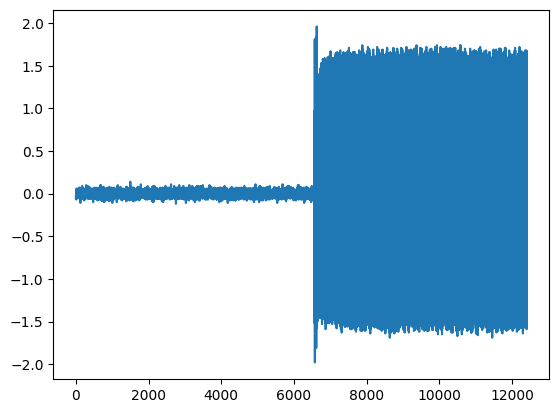

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/1589730864-1589730930.csv', names=["x","y","z","c"], sep=",",dtype={"x": np.float32, "y": np.float32, "z": np.float32, "c": np.float32})
df=df.drop(['x','z','c'], axis=1)
trial=np.array(df)
trial=trial[:12408]
plt.plot(trial)
plt.show()

Above has anomaly

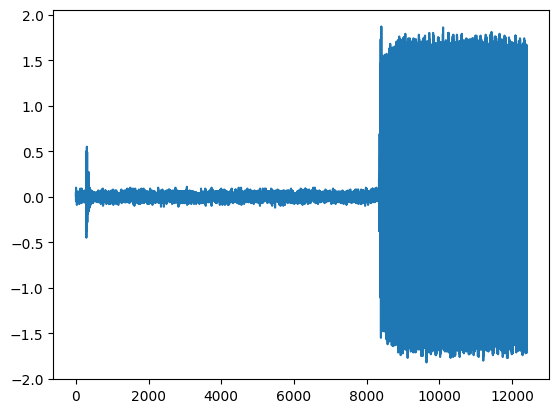

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/1589727180-1589727247.csv', names=["x","y","z","c"], sep=",",dtype={"x": np.float32, "y": np.float32, "z": np.float32, "c": np.float32})
df=df.drop(['x','z','c'], axis=1)
trial=np.array(df)
trial=trial[:12408]
plt.plot(trial)
plt.show()

Above has anomaly


**This file contains dataset of the normal functioning of the compressor and will be used to train the model**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/1589749293-1589749360.csv', names=["x","y","z","c"], sep=",",dtype={"x": np.float32, "y": np.float32, "z": np.float32, "c": np.float32})
df=df.drop(['x','z','c'], axis=1)
df.shape

(12763, 1)

**This file contains dataset of abnormal functioning and will be used to test the model**

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset/1589686645-1589686713.csv', names=["x","y","z","c"], sep=",",dtype={"x": np.float32, "y": np.float32, "z": np.float32, "c": np.float32})
df2=df2.drop(['x','z','c'], axis=1)
df2.shape

(12774, 1)

In [ ]:
healthy=np.array(df)
healthy=healthy[:12408]
print(healthy.shape)
healthy[:3]

(12408, 1)


array([[-0.92],
       [-1.35],
       [-0.38]], dtype=float32)

In [ ]:
anomalous=np.array(df2)
anomalous=anomalous[:12408]
print(anomalous.shape)
anomalous[:3]

(12408, 1)


array([[-1.16],
       [-1.35],
       [-0.03]], dtype=float32)

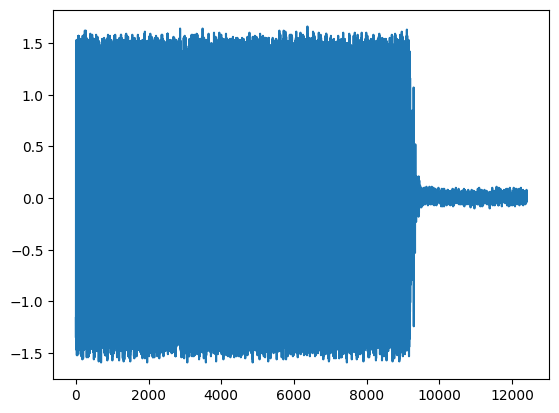

In [ ]:
plt.plot(anomalous)
plt.show()

**The above graph shows that turning off event occurs at around the 9000th measurement**

In [ ]:
# for normalizing data.
training_mean = healthy.mean()
training_std = healthy.std()
df_training_value = (healthy - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 12408


In [ ]:
TIME_STEPS = 188

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value)
print("Training input shape: ", x_train.shape)

Training input shape:  (12221, 188, 1)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"          #Rectified Linear Unit- -ve = 0 (nonlinearity)
        ),
        # slide over 7 data points at a time
        # filter moves by 2 units at a time
        layers.Dropout(rate=0.2),   #prevents overfitting 20%
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_11 (Conv1D)                   │ (None, 94, 32)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 94, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_12 (Conv1D)                   │ (None, 47, 16)              │           3,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_transpose_16                  │ (None, 94, 16)              │           1,808 │
│ (Conv1DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 94, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_transpose_17                  │ (None, 188, 32)             │           3,616 │
│ (Conv1DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_transpose_18                  │ (None, 188, 1)              │             225 │
│ (Conv1DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,505 (37.13 KB)

 Trainable params: 9,505 (37.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 0.5396 - val_loss: 0.0970
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.1130 - val_loss: 0.0431
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0701 - val_loss: 0.0299
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0554 - val_loss: 0.0230
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - loss: 0.0462 - val_loss: 0.0172
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0394 - val_loss: 0.0148
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 0.0342 - val_loss: 0.0117
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0305 - val_loss: 0.0107
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0276 - val_loss: 0.0099
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0255 - val_loss: 0.0096
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0238 - val_loss: 0.0089
Epoch 12/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0

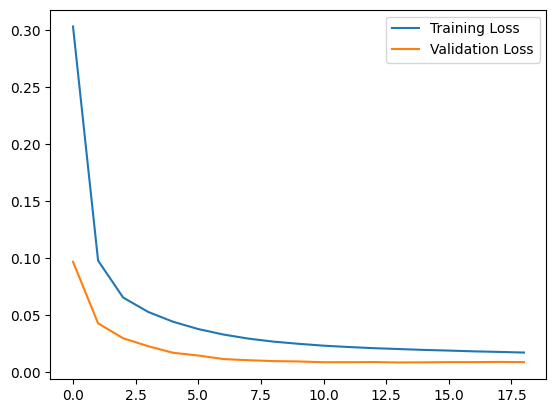

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

If the training loss continues to decrease while the validation loss starts increasing, it could indicate overfitting. But since they both are decreasing together, it indicates that there is no overfitting

382/382 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


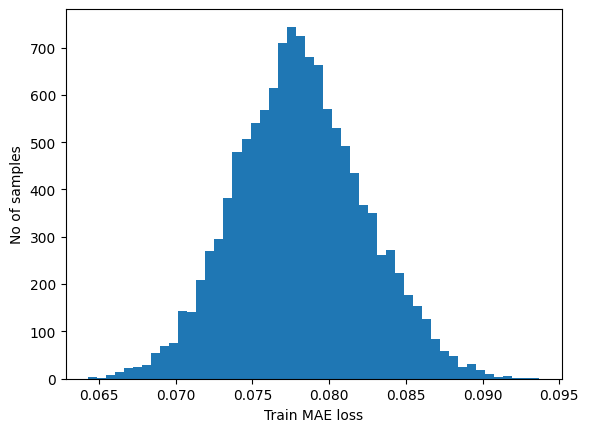

Reconstruction error threshold:  0.09368548


In [ ]:
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

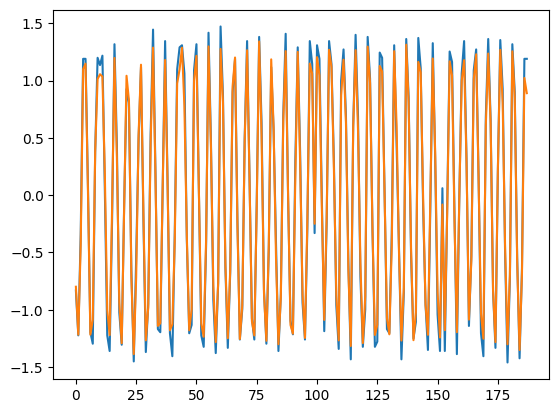

In [ ]:
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

**TESTING THE DATA**

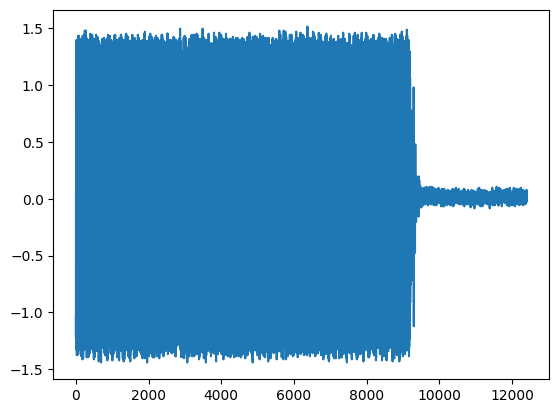

Test input shape:  (12221, 188, 1)
382/382 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


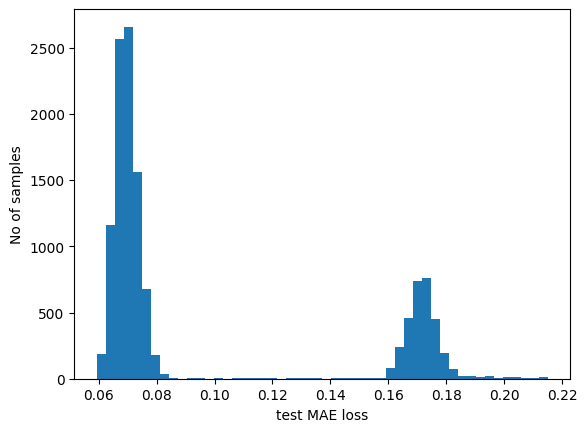

Number of anomaly samples:  3189
Indices of anomaly samples:  (array([ 9031,  9033,  9034, ..., 12218, 12219, 12220]),)


In [ ]:
df_test_value = (anomalous - training_mean) / training_std
plt.plot(df_test_value)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))                    #flattens into 1-D array

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

true_anomalies = np.array([0] * len(test_mae_loss)) #(0 = no anomaly, 1 = anomaly)
true_anomalies[8000:] = 1
anomalies = test_mae_loss > threshold

# True Positives (TP): correctly identified anomalies
TP = np.sum((anomalies == 1) & (true_anomalies == 1))

# False Positives (FP): incorrectly identified anomalies
FP = np.sum((anomalies == 1) & (true_anomalies == 0))

# True Negatives (TN): correctly identified non-anomalies
TN = np.sum((anomalies == 0) & (true_anomalies == 0))

# False Negatives (FN): incorrectly identified non-anomalies
FN = np.sum((anomalies == 0) & (true_anomalies == 1))

accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy}")

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
print(f"Precision: {precision}")

recall = TP / (TP + FN) if (TP + FN) > 0 else 0
print(f"Recall: {recall}")

f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
print(f"F1-score: {f1}")

Accuracy: 0.9155551918828246
Precision: 1.0
Recall: 0.7555081734186212
F1-score: 0.8607287449392713


In [ ]:
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

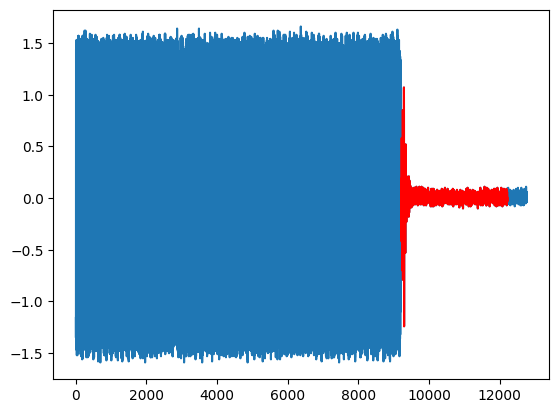

In [ ]:
df_subset = df2.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df2.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

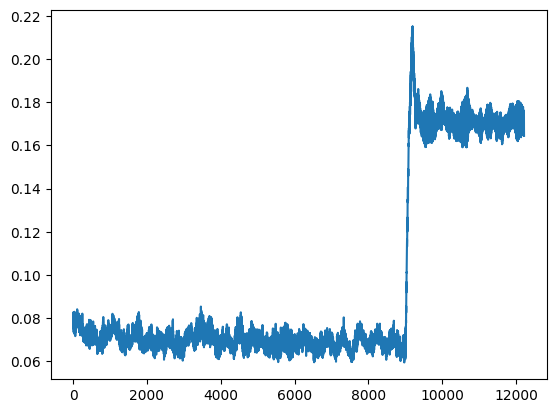

In [ ]:
plt.plot(test_mae_loss)
plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

extended_model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1D(
            filters=8, kernel_size=5, padding="same", strides=2, activation="relu"  # Extra layer
        ),
        layers.Conv1DTranspose(
            filters=8, kernel_size=5, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
        layers.Cropping1D(cropping=((2, 2)))  # cropping to 2 on each side
    ]
)

extended_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")

extended_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)                   │ (None, 94, 32)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 94, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 47, 16)              │           3,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 24, 8)               │             648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_transpose_19                  │ (None, 48, 8)               │             328 │
│ (Conv1DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_transpose_20                  │ (None, 96, 16)              │             912 │
│ (Conv1DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 96, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_transpose_21                  │ (None, 192, 32)             │           3,616 │
│ (Conv1DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_transpose_22                  │ (None, 192, 1)              │             225 │
│ (Conv1DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cropping1d_1 (Cropping1D)            │ (None, 188, 1)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,585 (37.44 KB)

 Trainable params: 9,585 (37.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_extended = extended_model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")],
    verbose=1
)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.6596 - val_loss: 0.1316
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 0.1546 - val_loss: 0.1009
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.1250 - val_loss: 0.0904
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.1100 - val_loss: 0.0814
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 0.0981 - val_loss: 0.0730
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 0.0870 - val_loss: 0.0546
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0702 - val_loss: 0.0410
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0570 - val_loss: 0.0317
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 0.0480 - val_loss: 0.0261
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0422 - val_loss: 0.0227
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 0.0383 - val_loss: 0.0205
Epoch 12/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss:

382/382 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


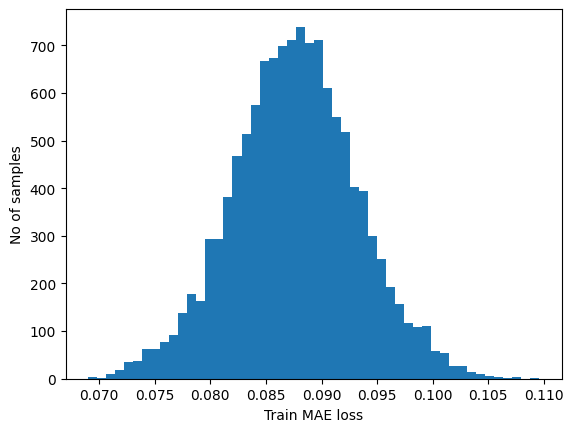

Reconstruction error threshold:  0.10956705


In [ ]:
import matplotlib.pyplot as plt
x_train_pred2 = extended_model.predict(x_train)
train_mae_loss2 = np.mean(np.abs(x_train_pred2 - x_train), axis=1)
plt.hist(train_mae_loss2, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold2 = np.max(train_mae_loss2)
print("Reconstruction error threshold: ", threshold2)

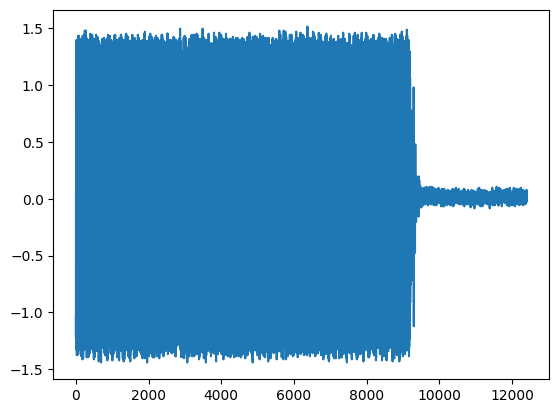

Test input shape:  (12221, 188, 1)
382/382 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


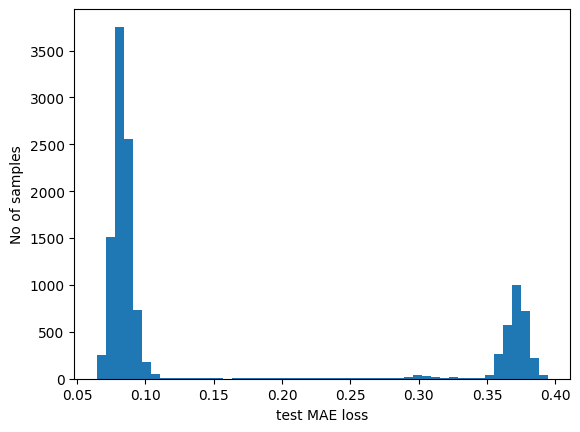

Number of anomaly samples:  3190


In [ ]:
df_test_value = (anomalous - training_mean) / training_std
plt.plot(df_test_value)
plt.show()
x_test = create_sequences(df_test_value)
print("Test input shape: ", x_test.shape)

x_test_pred_extended = extended_model.predict(x_test)
test_mae_loss_extended = np.mean(np.abs(x_test_pred_extended - x_test), axis=1)
test_mae_loss_extended = test_mae_loss_extended.reshape((-1))
x_test_cropped = x_test[:, 2:-2, :]

plt.hist(test_mae_loss_extended, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies_extended = test_mae_loss_extended > threshold2
print("Number of anomaly samples: ", np.sum(anomalies_extended))

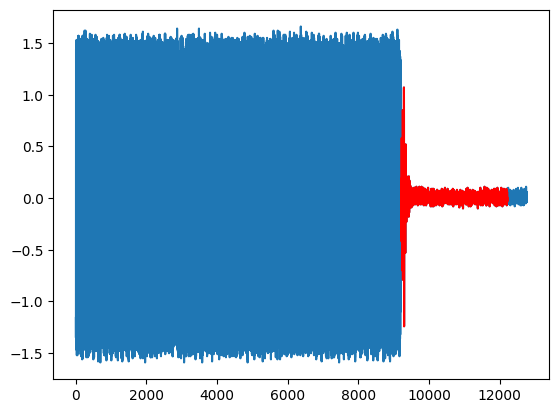

In [ ]:
anomalous_data_indices2 = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

df_subset2 = df2.iloc[anomalous_data_indices2]
fig, ax = plt.subplots()
df2.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

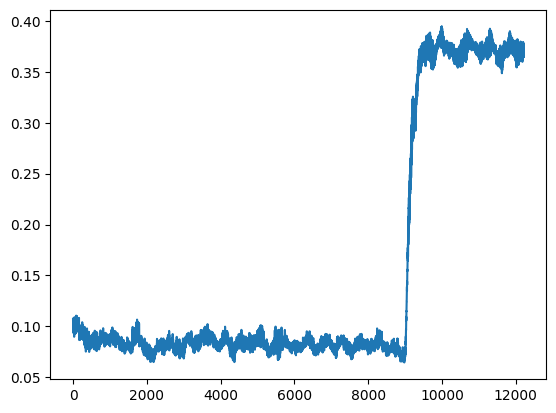

In [ ]:
plt.plot(test_mae_loss_extended)
plt.show()

In [ ]:
true_anomalies_ex = np.array([0] * len(test_mae_loss_extended)) #(0 = no anomaly, 1 = anomaly)
true_anomalies_ex[8000:] = 1
anomalies_ex = test_mae_loss_extended > threshold2

# True Positives (TP): correctly identified anomalies
TP2 = np.sum((anomalies_ex == 1) & (true_anomalies_ex == 1))

# False Positives (FP): incorrectly identified anomalies
FP2 = np.sum((anomalies_ex == 1) & (true_anomalies_ex == 0))

# True Negatives (TN): correctly identified non-anomalies
TN2 = np.sum((anomalies_ex == 0) & (true_anomalies_ex == 0))

# False Negatives (FN): incorrectly identified non-anomalies
FN2 = np.sum((anomalies_ex == 0) & (true_anomalies_ex == 1))

accuracy_extended = (TP2 + TN2) / (TP2 + TN2 + FP2 + FN2)
print(f"Accuracy: {accuracy_extended}")

precision_extended = TP2 / (TP2 + FP2) if (TP2 + FP2) > 0 else 0
print(f"Precision: {precision_extended}")

recall_extended = TP2 / (TP2 + FN2) if (TP2 + FN2) > 0 else 0
print(f"Recall: {recall_extended}")

f1_extended = 2 * (precision_extended * recall_extended) / (precision_extended + recall_extended) if (precision_extended + recall_extended) > 0 else 0
print(f"F1-score: {f1_extended}")



Accuracy: 0.9151460600605515
Precision: 0.9990595611285267
Recall: 0.7550343520492774
F1-score: 0.8600728646606395
